# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** ÚNICA

**Nomes dos Integrantes:**

1- Eugênia Cornils

2- Mariana Barros

3- Tiago Leite

## Qualidade de vinhos.

Você foi contratado como cientista de dados pela famosa vinícola **"Vini Tradizionali di Manduria"** para analisar todos os aspectos dos vinhos produzidos. Diversas questões foram levantadas, como: Compreender os padrões das características que proporcionam boas safras e a qualidade de novos vinhos produzidos, antes que a comunidade mundial **"Vins Spectaculaires"** os deguste, apontar quais são os novos **"blends"** que podem ter continuidade no desenvolvimento, dentre várias outras atividades que visam as boas tomadas de decisões, sempre com o intuito de servir os melhores rótulos, aumentando os lucros e diminuindo os gastos.        

A equipe de enólogos faz estudos frequentes para verificar as características de cada vinho, colocando-os em planilhas. Para melhor compreensão dos dados, descreveram o que significado de cada propriedade.   


##### Descrição

**0. Color:** Se o vinho é tinto vermelho ou branco

**1. Fixed Acidity:** Qtd.de Ácido não volátil, aquele que não evapora fácil

**2. Volatile Acidity:** Teor de ácido acético que leva a um sabor desagradável de vinagre

**3. Citric Acid:** Um tipo de ácido que age como conservante para aumentar o nível de acidez em pequena quantidade para adicionar aroma e sabor

**4. Residual Sugar:** Qtd. de açúcar restante depois da fermentação, mais de 45g/litro é doce

**5. Chlorides:** Qtd. de sal

**6. Free Sulfur Dioxide:** Componente que impede crescimento microbiano e a oxidação do vinho

**7. Total Sulfur Dioxide:** Qtd. de SO2 (dióxido de enxofre)

**8. Density:** Densidade do vinho,

**9. pH:** Nível de acidez ou potencial hidrogeniônico

**10. Sulphates:** Um adicional que contribui para níveis de SO2 e é
antimicróbico e antioxidante

**11. Alcohol:** Qtd. de álcool

**12. Qualidade:** Notas de 3 a 9

# Questões

### Importe todas as bibliotecas necessárias na célula abaixo
##### Organize-as de forma crescente em relação ao tamanho da frase

In [ ]:
!pip install lightgbm xgboost catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install plotly

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=2d75b99ee65c4057ed8ef99e926bc233f0ab5038ba9118df2514a5cefd72063e
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from time import time
import warnings as warn
from sklearn import svm
import plotly.express as px
from sklearn import datasets
from matplotlib import style
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from pyod.models.iforest import IForest
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as skPCA
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
warn.filterwarnings('ignore')


from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Tratamento dos Dados


Sir. Pounce, enólogo de longa data, especializado em vinhos italianos, descobriu que estão faltando alguns valores nas planilhas, e que outros dados foram alterados pelo ex-funcionário Smeagle, dispensado por degustar vinhos 'preciosos'.   

**Utilize o dataset 'wines_preprocessing.csv' para fazer as questões abaixo.**

1- Busque os valores faltantes no dataset e trate-os.

2- Busque valores incongruentes no dataset, imprima e os trate.

3- Valide seus tratamentos com o dataset **'wines.csv'**, demonstrando se foi possível manter as distribuições de forma adequada.

In [ ]:
#importar a base de dados wines_pre_processing
wines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines_pre_processing.csv')

In [ ]:
#importar a base de dados wines
wines2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines.csv')

In [ ]:
#observar o data frame com 100 linhas
wines.head(100)

,Unnamed: 0,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99,3.28,0.51,13.4,6
1,1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.4,0.75,9.8,5
2,2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.9898,3.28,0.36,12.7,9
3,3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.9962,3.42,0.4,9.3,7
4,4,white,7.1,0.2,0.34,16.0,0.05,51.0,166.0,0.9985,3.21,0.6,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,white,6.5,0.27,0.19,6.6,0.045,98.0,175.0,0.99364,3.16,0.34,10.1,6
96,96,white,7.2,0.2,0.34,2.7,0.032,49.0,151.0,0.99,3.16,0.39,12.7,7
97,97,red,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6
98,98,white,6.0,0.36,0.39,3.2,0.027,20.0,125.0,0.991,3.38,0.39,11.3,7


In [ ]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6497 non-null   int64 
 1   color                 6494 non-null   object
 2   fixed acidity         6490 non-null   object
 3   volatile acidity      6495 non-null   object
 4   citric acid           6493 non-null   object
 5   residual sugar        6495 non-null   object
 6   chlorides             6490 non-null   object
 7   free sulfur dioxide   6495 non-null   object
 8   total sulfur dioxide  6496 non-null   object
 9   density               6496 non-null   object
 10  pH                    6495 non-null   object
 11  sulphates             6491 non-null   object
 12  alcohol               6493 non-null   object
 13  quality               6497 non-null   object
dtypes: int64(1), object(13)
memory usage: 710.7+ KB


In [ ]:
#transforma dados que são object em numéricos
wine= wines['color']
for col in wines.columns:
  wines[col] = pd.to_numeric(wines[col], errors='coerce')
wines['color']= wine

In [ ]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   color                 6494 non-null   object 
 2   fixed acidity         6479 non-null   float64
 3   volatile acidity      6484 non-null   float64
 4   citric acid           6482 non-null   float64
 5   residual sugar        6484 non-null   float64
 6   chlorides             6479 non-null   float64
 7   free sulfur dioxide   6484 non-null   float64
 8   total sulfur dioxide  6485 non-null   float64
 9   density               6485 non-null   float64
 10  pH                    6484 non-null   float64
 11  sulphates             6480 non-null   float64
 12  alcohol               6482 non-null   float64
 13  quality               6492 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 710.7+ KB


In [ ]:
#observa quantos valores de color tem de cada tipo, são identificados problemas nos dados
wines['color'].value_counts()

white                                         4887
red                                           1596
dois                                             2
ml                                               2
leonidas, para te arrumar essas "confusão"       1
amo                                              1
vinho ruim                                       1
deep learning                                    1
my precious                                      1
vai dar não                                      1
bart                                             1
Name: color, dtype: int64

In [ ]:
#é definida uma condição das cores dos vinhos serem somente brancos ou tintos
condition = (wines['color'] == 'white') | (wines['color'] == 'red')

# Fazer drop das linhas que não atendem à condição
wines = wines[condition]

In [ ]:
wines.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6483.000000,6465.000000,6470.000000,6468.000000,6470.000000,6465.000000,6470.000000,6471.000000,6471.000000,6470.000000,6466.000000,6468.000000,6478.000000
mean,3248.791917,7.216110,0.339781,0.318513,5.443215,0.056082,30.531298,115.772755,0.994698,3.218461,0.531397,10.490419,5.817691
std,1876.081594,1.296177,0.164836,0.145270,4.761461,0.035090,17.748775,56.545582,0.002999,0.160918,0.148769,1.191568,0.872945
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1623.500000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,4874.500000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
#São identificados dados nulos
(wines.isnull().sum())/len(wines)*100

Unnamed: 0              0.000000
color                   0.000000
fixed acidity           0.277649
volatile acidity        0.200524
citric acid             0.231374
residual sugar          0.200524
chlorides               0.277649
free sulfur dioxide     0.200524
total sulfur dioxide    0.185099
density                 0.185099
pH                      0.200524
sulphates               0.262224
alcohol                 0.231374
quality                 0.077125
dtype: float64

In [ ]:
#como são poucos valores nulos eles serão apagados
win = wines.dropna()

In [ ]:
#é feita a divisão de color em duas colunas
win = pd.get_dummies(win, columns=['color'])

Analisar onde colocar esses gráficos

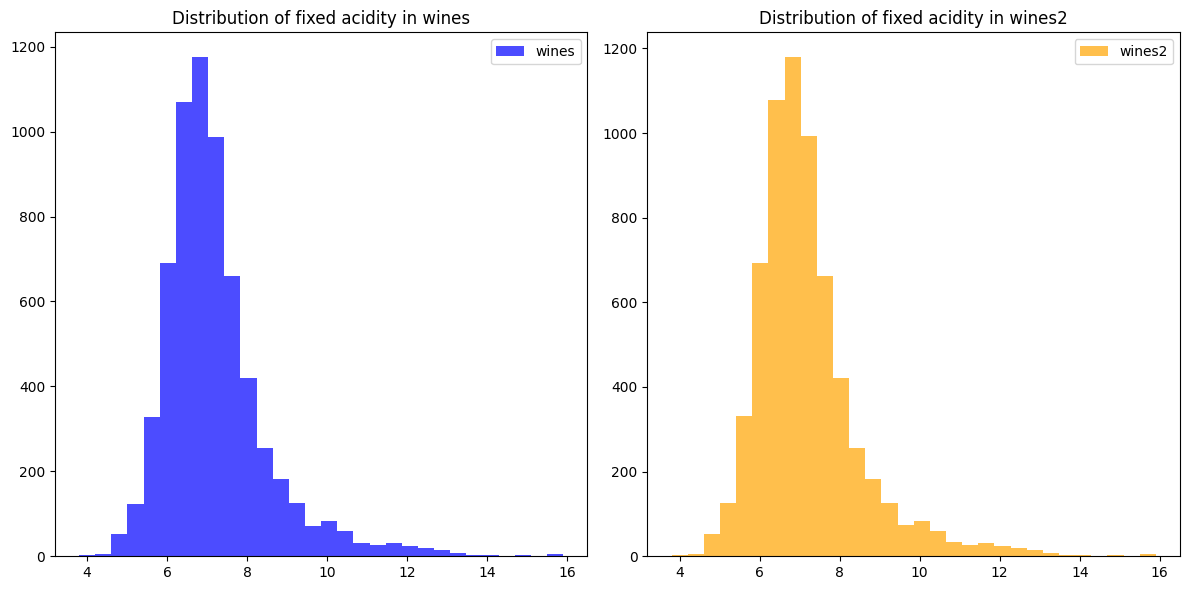

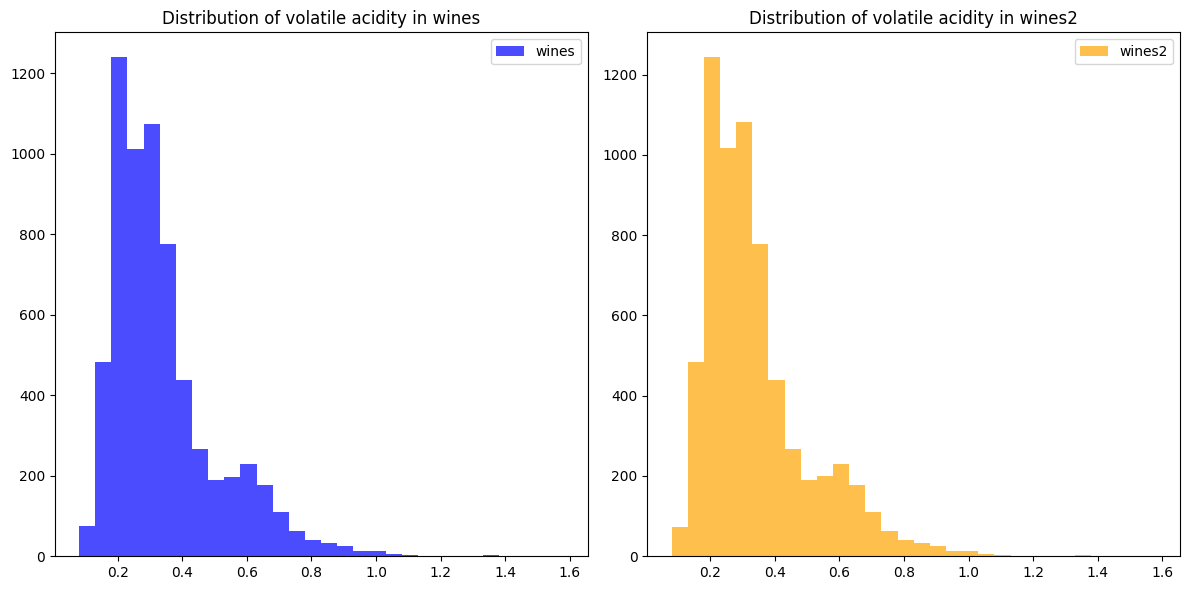

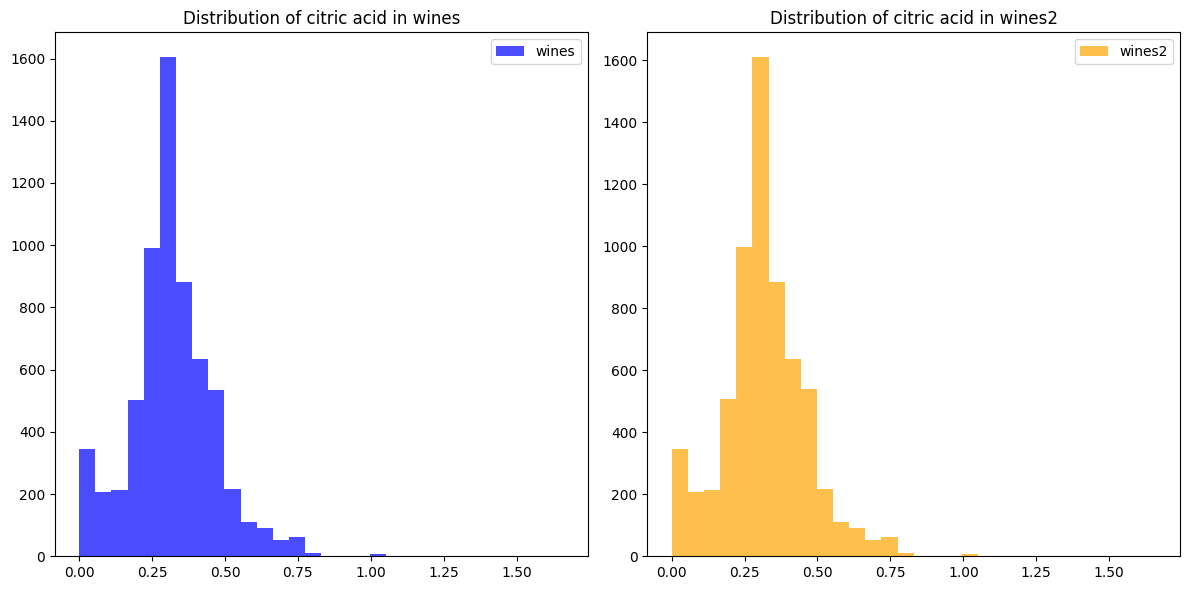

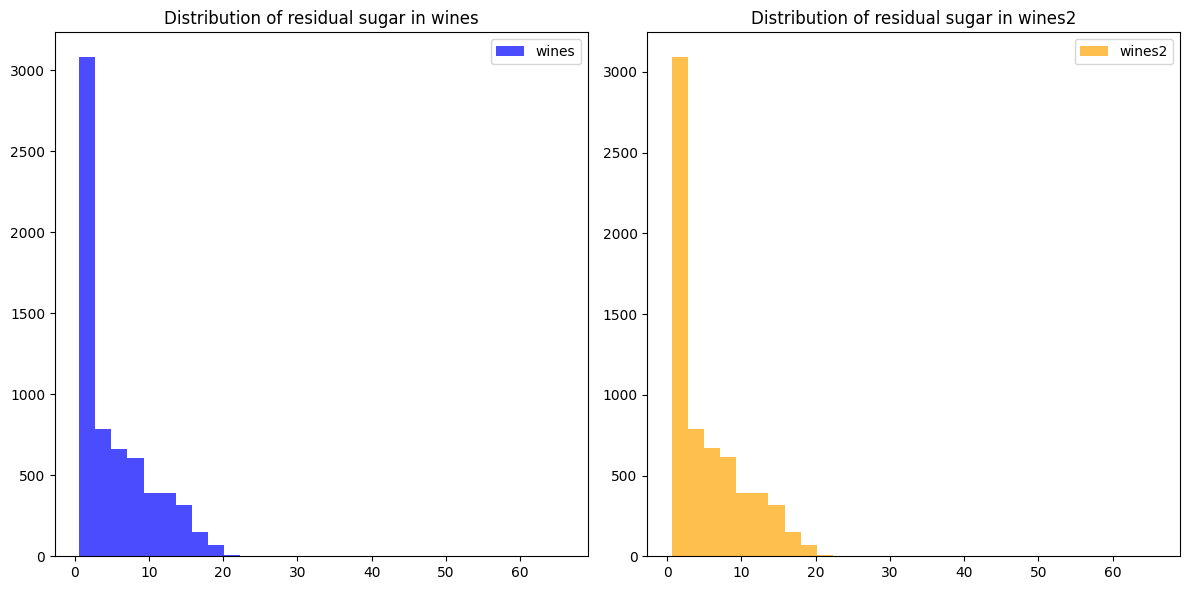

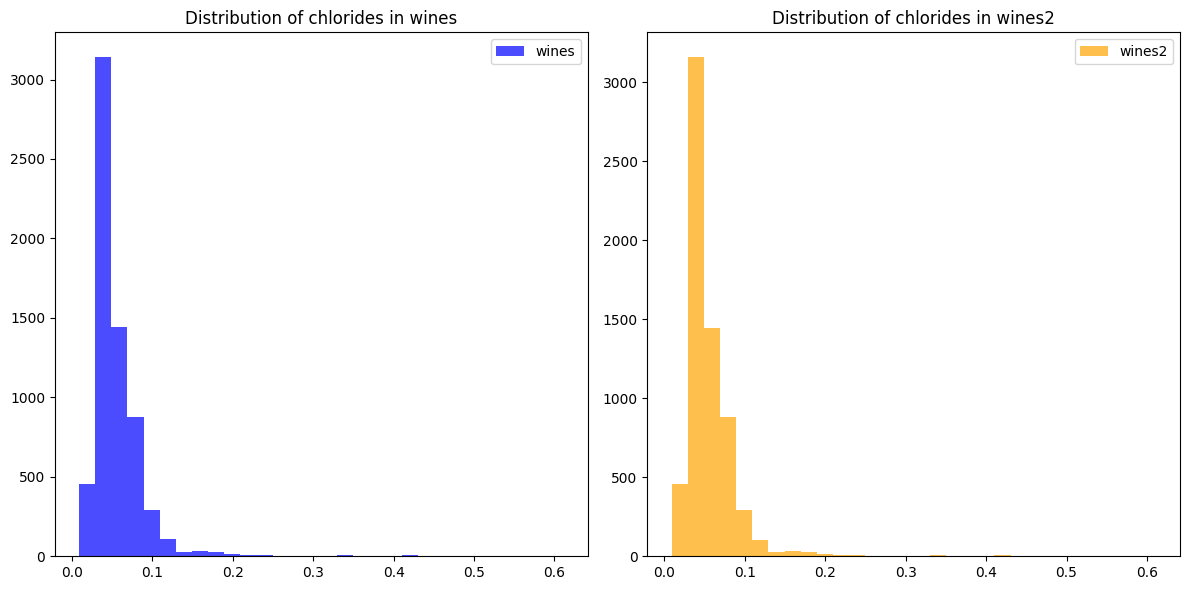

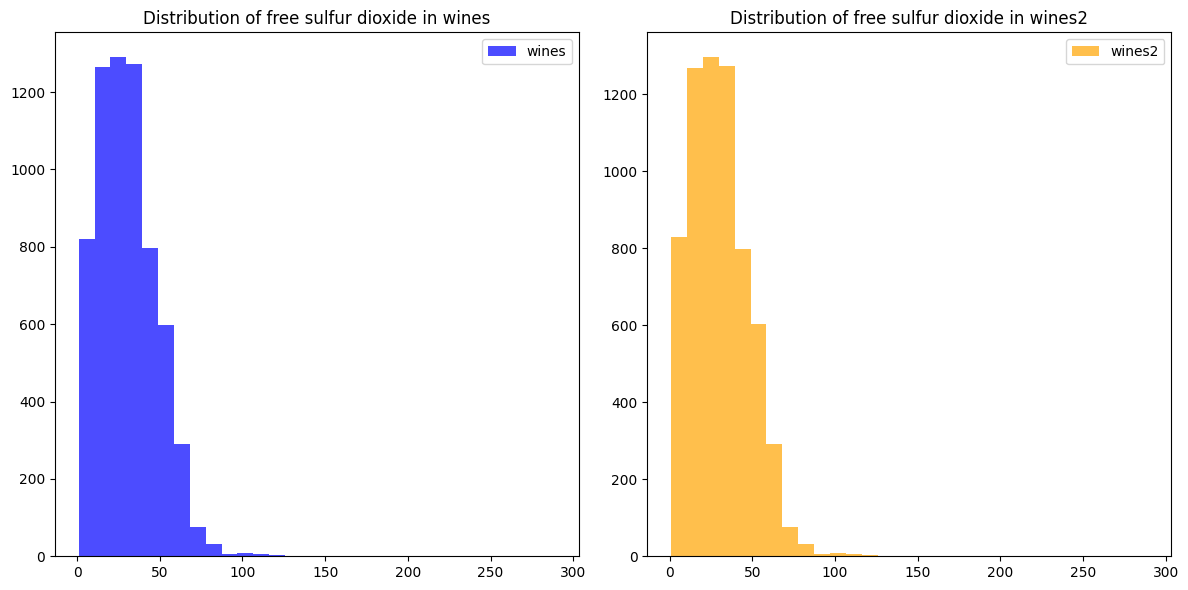

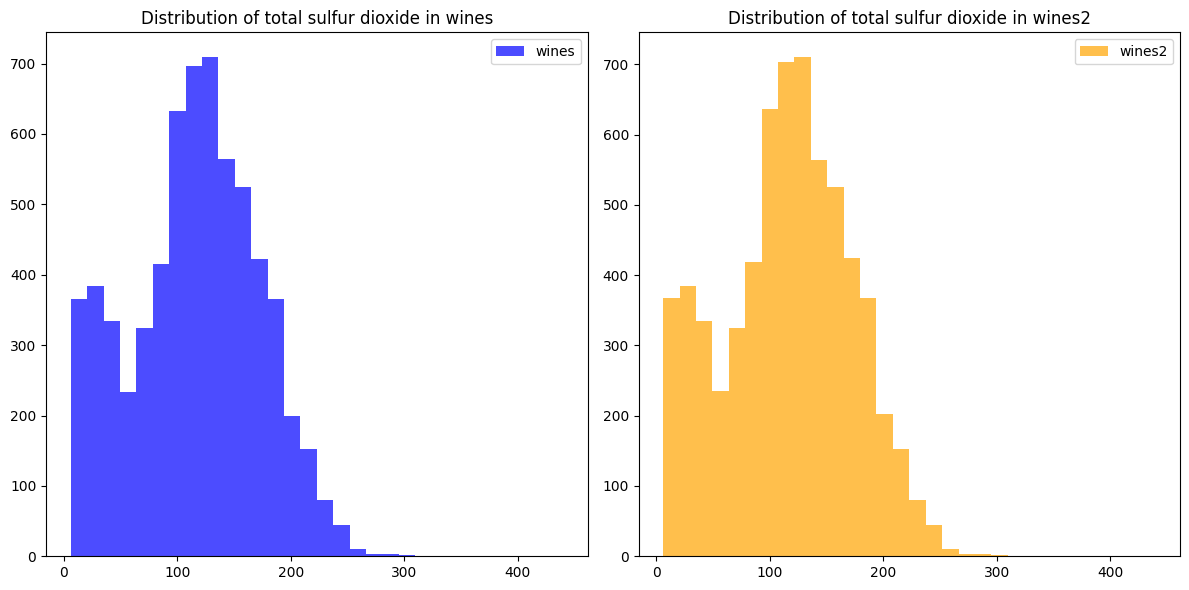

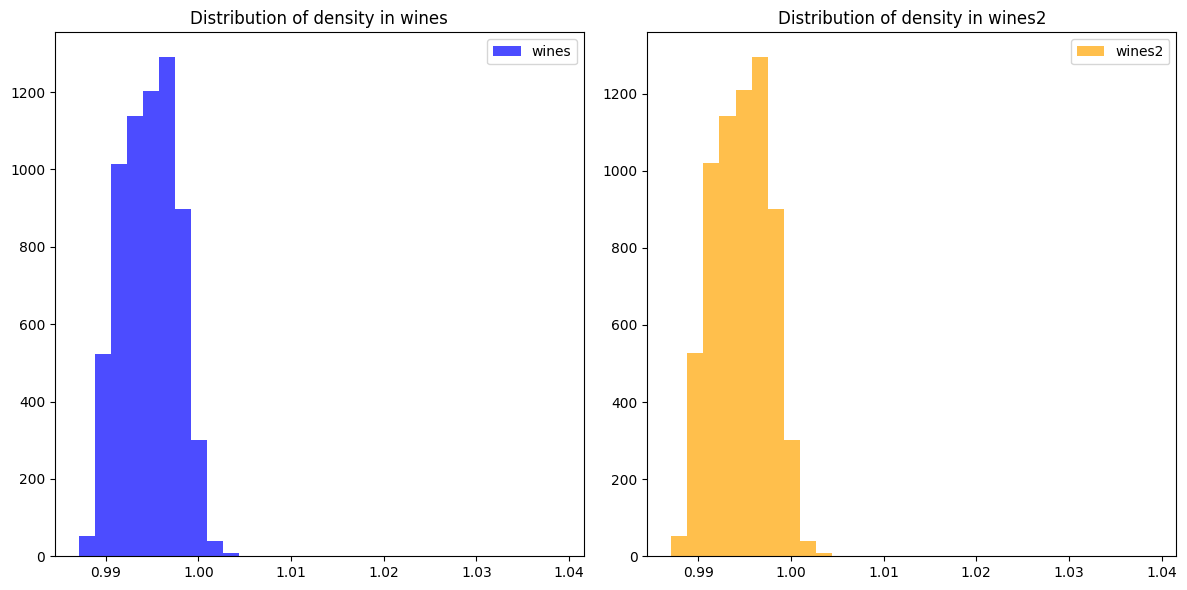

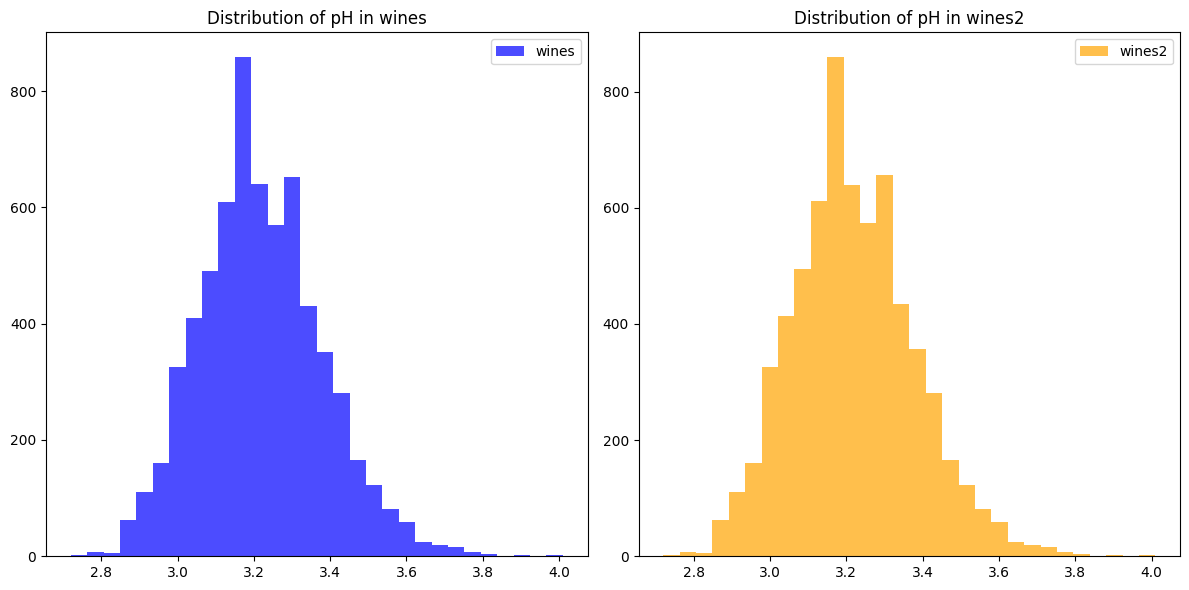

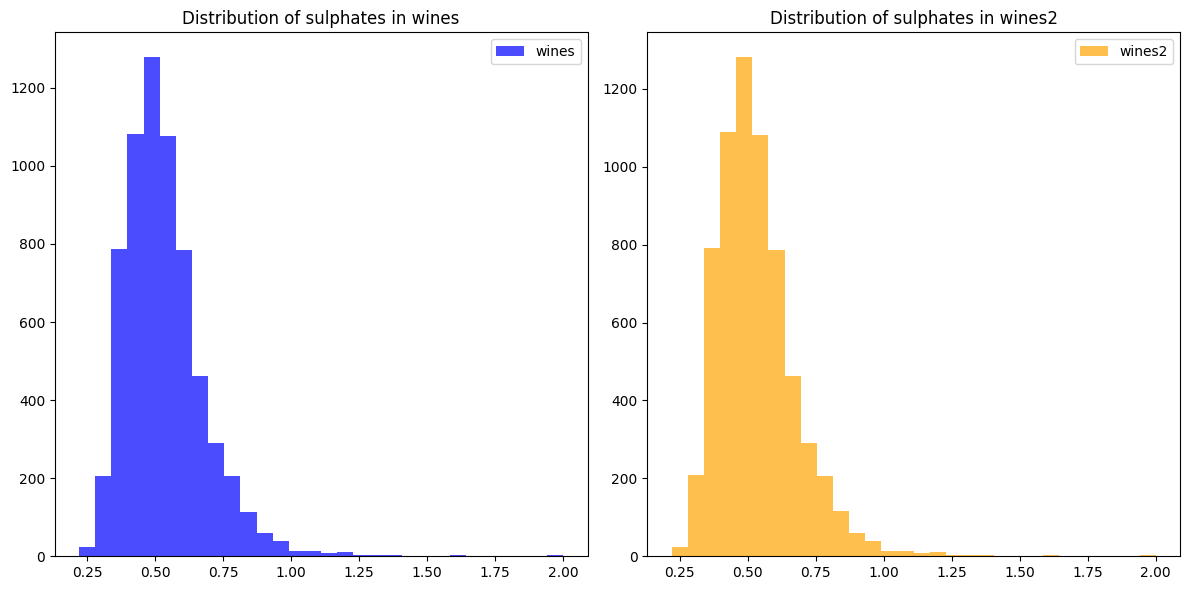

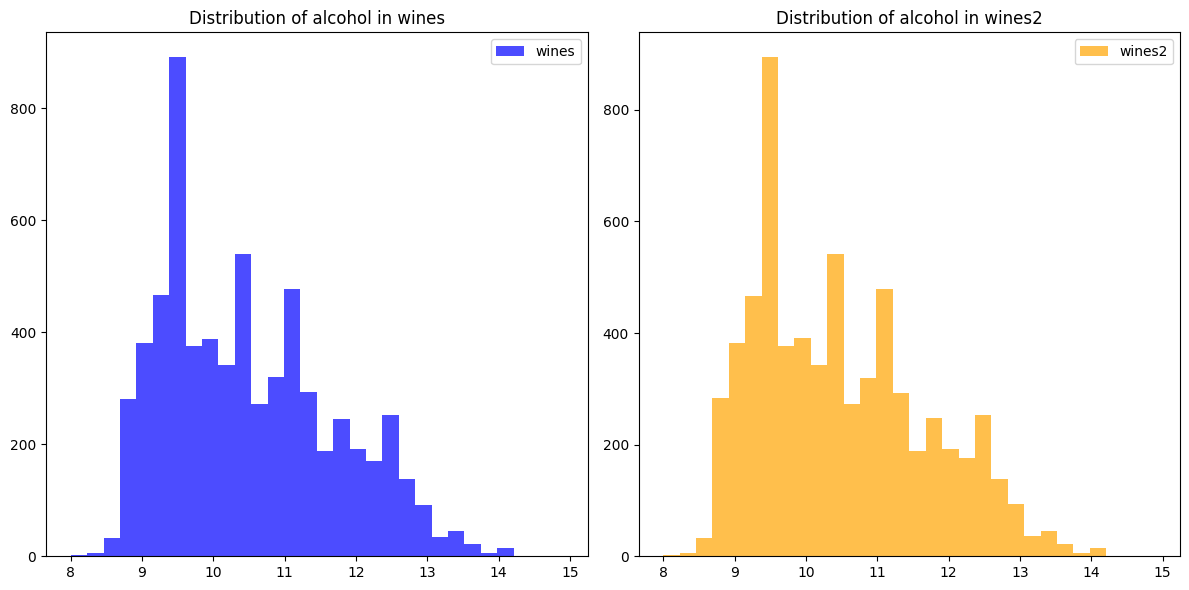

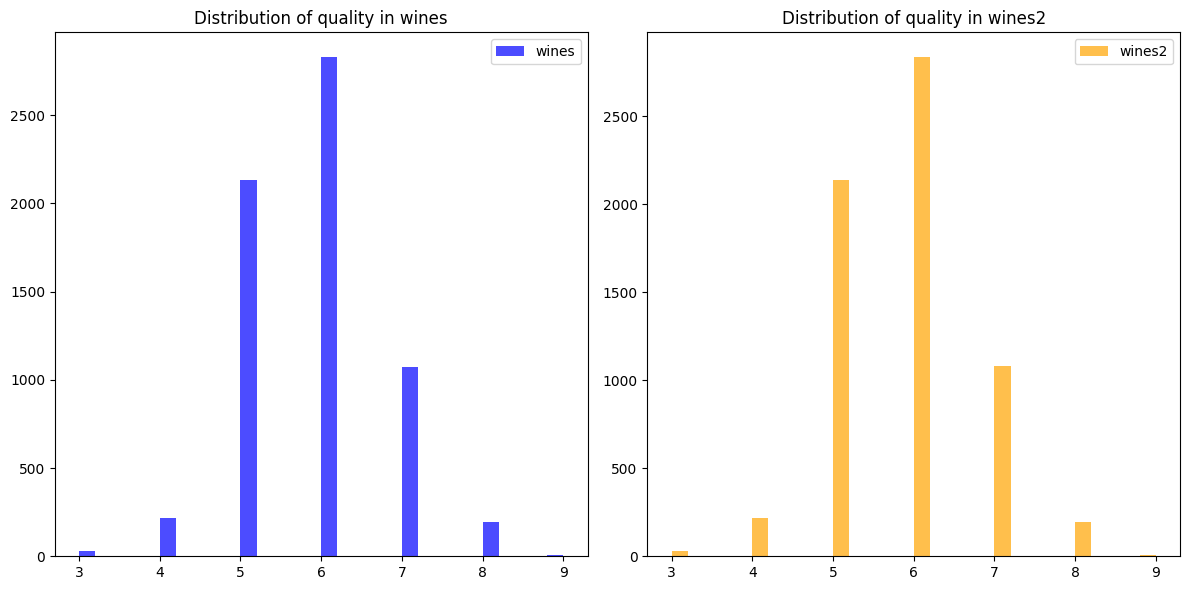

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'wines' and 'wines2' have the same structure and column names
columns_to_compare = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                       'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Plot histograms for each column
for column in columns_to_compare:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(wines[column], bins=30, color='blue', alpha=0.7, label='wines')
    plt.title(f'Distribution of {column} in wines')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(wines2[column], bins=30, color='orange', alpha=0.7, label='wines2')
    plt.title(f'Distribution of {column} in wines2')
    plt.legend()

    plt.tight_layout()
    plt.show()


O dono da vinícola, Sir. Donald Shelby, tem um filho cursando especialização em ciência de dados, que, ao deparar-se com o dataset, pediu a você que, ao invés de ficar tratando dados com 'essas' técnicas triviais, fizesse um algoritmo de regressão logística para encontrar os valores faltantes na coluna 'Alcohol'. O Sr. Shelby é um homem conhecido como mafioso e considera seu filho um gênio, por isso, você, com fortes receios de sofrer consequências inusitadas por ordem do Don Corleone da atualidade, acatou o "pedido".


4- Desenvolver um algoritmo de regressão logística visando preencher os dados faltantes da coluna "Alcohol". Em seguida, valide os resultados com o dataset **"wines.csv"**, apresentando todas as métricas de classificação estudadas.

5- Você, ao ver os resultados encontrados, se adiantou e fez um modelo de regressão polinomial para dirimir a questão. Em seguida, validou os resultados com o dataset **"wines.csv"**, utilizando todas as métricas de regressão estudadas. Por fim, escreverá um e-mail explicando o motivo <u>técnico</u> que o levou a não utilizar a regressão logística neste problema, bem como qual a melhor técnica que encontrou para tratar os valores faltantes.

In [ ]:
wines3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines.csv')
wine= wines3['color']
for col in wines3.columns:
  wines3[col] = pd.to_numeric(wines3[col], errors='coerce')
wines3['color']= wine
win3 = pd.get_dummies(wines3, columns=['color'])
indices_nulos = wines[wines['alcohol'].isnull()].index
linhas_correspondentes_df2 = wines.loc[indices_nulos]
scaler = MinMaxScaler()
win3 = win3.loc[indices_nulos]
X_alcool_comp = win3.drop('alcohol',axis=1)
y_alcool_comp = win3.loc[:,'alcohol']
numeric_columns = X_alcool_comp.select_dtypes(include=['float64', 'int64']).columns
win3[numeric_columns] = scaler.fit_transform(win3[numeric_columns])

In [ ]:
wines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines_pre_processing.csv')
condition = (wines['color'] == 'white') | (wines['color'] == 'red')
wines = wines[condition]
wine= wines['color']
for col in wines.columns:
  wines[col] = pd.to_numeric(wines[col], errors='coerce')
wines['color']= wine
win = pd.get_dummies(wines, columns=['color'])
win7 = win
win = win.dropna()
wines = pd.get_dummies(wines, columns=['color'])

In [ ]:
win7

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6.0,0,1
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5.0,1,0
2,2,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9.0,0,1
3,3,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7.0,0,1
4,4,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6.0,0,1
6493,6493,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7.0,0,1
6494,6494,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7.0,0,1
6495,6495,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5.0,0,1


In [ ]:
win['categoria_alcool'] = pd.cut(win['alcohol'], bins=[0, 10, 20], labels=['baixo', 'alto'], right=False)
win7['categoria_alcool'] = pd.cut(win7['alcohol'], bins=[0, 10, 20], labels=['baixo', 'alto'], right=False)

In [ ]:
X = win.drop(['alcohol', 'categoria_alcool'], axis=1)

In [ ]:
#realizar a normalizaçãoo utilizando o MinMax
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
# Cria uma instância do MinMaxScaler
scaler = MinMaxScaler()
# Aplica a transformação às colunas numéricas
win[numeric_columns] = scaler.fit_transform(win[numeric_columns])
win7[numeric_columns] = scaler.fit_transform(win7[numeric_columns])

#Regressão Logística

In [ ]:
# Criar 'categoria_alcool' apenas para os valores faltantes
win7['categoria_alcool'] = pd.cut(win['alcohol'], bins=[-float('inf'), 10, float('inf')], labels=['baixo', 'alto'], right=False)

# Dividir o DataFrame em dois: um com valores conhecidos e outro com valores faltantes
df_known = win7.dropna(subset=['categoria_alcool'])
df_unknown = win7[win7['categoria_alcool'].isnull()]

# Verificar se há dados suficientes para treinar o modelo
if len(df_known) > 1:  # Garantir pelo menos duas amostras
    # Dividir os dados conhecidos em recursos (X) e rótulos (y)
    X = df_known.drop(['alcohol', 'categoria_alcool'], axis=1)  # Excluir 'alcohol' e 'categoria_alcool' dos recursos
    y = df_known['categoria_alcool']

    # Imputar valores ausentes em X
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Criar modelo de regressão logística
    model = LogisticRegression(max_iter=1000)

    # Treinar o modelo
    model.fit(X_imputed, y)

    # Imputar valores ausentes em X_unknown
    X_unknown = df_unknown.drop(['alcohol', 'categoria_alcool'], axis=1)
    X_unknown_imputed = imputer.transform(X_unknown)

    # Prever valores faltantes na coluna 'categoria_alcool'
    predicted_categories = model.predict(X_unknown_imputed)

    # Preencher os valores faltantes na coluna 'categoria_alcool'
    win7.loc[win7['categoria_alcool'].isnull(), 'categoria_alcool'] = predicted_categories

    # # Preencher os valores de 'alcohol' com base na classificação em 'categoria_alcool'
    # win['alcohol'] = win.apply(lambda row: row['alcohol'] if pd.notnull(row['alcohol']) else 10.0 if row['categoria_alcool'] == 'baixo' else 15.0, axis=1)

    # Preencher os valores de 'alcohol' com base na classificação em 'categoria_alcool'
    win7['alcohol'] = win7.apply(lambda row: row['alcohol'] if pd.notnull(row['alcohol']) else np.random.uniform(8, 10) if row['categoria_alcool'] == 'baixo' else np.random.uniform(10, 15), axis=1)
    # Exibir o DataFrame resultante
    print(win7)
else:
    print("Não há dados suficientes para treinar o modelo.")

      Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
0       0.000000       0.231405          0.226667     0.198795   
1       0.000154       0.256198          0.366667     0.012048   
2       0.000308       0.256198          0.186667     0.204819   
3       0.000462       0.239669          0.020000     0.204819   
4       0.000616       0.272727          0.080000     0.204819   
...          ...            ...               ...          ...   
6492    0.999384       0.231405          0.106667     0.180723   
6493    0.999538       0.280992          0.060000     0.222892   
6494    0.999692       0.165289          0.146667     0.228916   
6495    0.999846       0.231405          0.133333     0.180723   
6496    1.000000       0.214876          0.133333     0.168675   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0           0.033742   0.041528             0.048611              0.182028   
1           0.019939   0.114618             0.05902

In [ ]:
mse = mean_squared_error(win3['alcohol'].loc[indices_nulos], win7['alcohol'].loc[indices_nulos])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.423358503018233


# Regressão Linear

In [ ]:
# columns_to_scale = win.columns[:-3]  # Excluindo as três últimas colunas
# scaler = StandardScaler()
# win[columns_to_scale] = scaler.fit_transform(win[columns_to_scale])

In [ ]:
win = win.drop('Unnamed: 0',axis=1)

In [ ]:
X_alcool = win.drop({'alcohol','categoria_alcool'},axis=1)
y_alcool = win.loc[:,'alcohol']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_alcool,y_alcool ,test_size=0.30, random_state=101)

In [ ]:
(X_train.isnull().sum())/len(win)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
quality                 0.0
color_red               0.0
color_white             0.0
dtype: float64

In [ ]:
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lmodel.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.2090710332271965


In [ ]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.15890790979303496


In [ ]:
y_pred_faltantes = model.predict(X_alcool_comp)

In [ ]:
mse = mean_squared_error(y_alcool_comp, y_pred_faltantes)
print(f'Mean Squared Error: {mse}')

MAPE = np.mean(np.abs((y_alcool_comp - y_pred_faltantes) / y_alcool_comp)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Mean Squared Error: 168919763.64544395
Valor do MAPE dado em percentual: 88908.65295159006


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parâmetros do modelo
params = {
    'objective': 'reg:squarederror',  # Objetivo para regressão
    'max_depth': 7,                    # Profundidade máxima da árvore
    'learning_rate': 0.1,              # Taxa de aprendizado
    'n_estimators': 800                # Número de árvores
}

# Treine o modelo XGBoost
model = xgb.train(params, dtrain, num_boost_round=100)

# Faça previsões no conjunto de teste
y_pred = model.predict(dtest)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
MAPE = np.mean(np.abs((y_alcool_comp - y_pred_faltantes) / y_alcool_comp)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")


Mean Squared Error: 0.1346885150883265
Valor do MAPE dado em percentual: 88908.65295159006


In [ ]:
dcompara = xgb.DMatrix(X_alcool_comp, label=y_pred_faltantes)
y_pred_faltantes = model.predict(dcompara)
mse = mean_squared_error(y_alcool_comp, y_pred_faltantes)
print(f'Mean Squared Error: {mse}')
MAPE = np.mean(np.abs((y_alcool_comp - y_pred_faltantes) / y_alcool_comp)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Mean Squared Error: 2.9463727853167656
Valor do MAPE dado em percentual: 15.216434163794156


In [ ]:
y_pred_faltantes

array([12.118704 , 12.213768 , 11.6181965, 11.810096 , 12.102975 ,
       11.581762 , 11.753398 , 11.434125 , 11.524194 , 11.413835 ,
       11.571645 , 10.574545 , 12.223197 , 11.494279 , 11.404613 ],
      dtype=float32)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
MAPE = np.mean(np.abs((y_alcool_comp - y_pred_faltantes) / y_alcool_comp)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Mean Squared Error: 0.1346885150883265
Valor do MAPE dado em percentual: 15.216434163794156


**Prezado Sir. Donald Shelby,**

---



Conforme a solicitação do seu filho foi realizada a regressão logística para prever o valor de alcohol, a princípio me causou um pouco de estranhamento essa escolha, pois em geral essa técnica é utilizada para prever valores binários, onde em geral o objetivo é identificar a probabilidade de pertencer a alguma classe.
Porém, estudando um pouco mais observei que pode ser utilizada a técnica de categorização, assim gerei com os dados uma nova coluna chamada categoria_alcool em que o alcool era avaliado com baixo teor de álcool e alto teor de álcool.Depois disso foi realizada uma regressão logística nos dados já escalonados da base de dados para prever se a categoria de álcool seria baixa ou alta, e com o resultado da predição da regressão foram lançados valores aleatórios para o álcool entre seus limites de classificação.
O erro quadrático médio quando comparamos os valores faltantes da base de dados em processamento com a já processada  foi de 1,8 na regressão logística, 0,14 na regressão liear, 0,11 na regressão Polinomial e 0,09 utilizando o modelo XGBosst.
Assim a melhor escolha será a utilização do modelo XGBoost.

Atenciosamente,
Equipe formada por
1- Eugênia Cornils
2- Mariana
3- Tiago Leite



### Análise Exploratória
**Utilize o dataset 'wines.csv'**

A enóloga Marilyn Monroe, direta do Sir. Pounce, tomou conhecimento de suas habilidades exploratórias e requereu gráficos "chiques, rebuscados, enfeitados e nada triviais" que mostrassem, de forma interativa todos os dados e seus respectivos insights. A principal exigência é de que as paletas de cores sejam harmônicas, de modo que possam ser utilizadas em apresentações. Para isso, sugeriu a documentação a seguir:
[Colors Palettes](https://plotly.com/python/builtin-colorscales/)

1- Utilize um countplot para averiguar a quantidade de vinhos por cada avaliação de qualidade.
Separare entre vinhos tintos e brancos, fazendo um gráfico para cada tipo.

2- Utilize um jointplot para descrever a relação entre álcool e açucar. Utilizar o tipo 'KDE'.

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize **x = 'quality'** e **y='residual sugar'**. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos
e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.   

4- Faça um gráfico de correlação e encontre quais são as 'features' que contém correlações
positivas e negativas fortes  entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y"
cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados
das respectivas formas.

**ps**: Para este problema, entenda como correlações fortes valores menores que -0.4 e maiores que 0.4.

In [ ]:
wines4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines.csv')
mappings={'white':0,'red':1}
wines4['color']=wines4['color'].map(mappings)

In [ ]:
import plotly.express as px

# Substitua 'wines4' pelo nome real do seu DataFrame
# Certifique-se de que sua base de dados 'wines4' possui as colunas 'color' e 'quality'
fig = px.histogram(wines4, x='quality', color='color', barmode='group', title='Quantidade de Vinhos por Qualidade', labels={'quality': 'Qualidade'}, category_orders={'color': ['red', 'white']})

# Exibir o gráfico interativo
fig.show()

In [ ]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Substitua 'wines4' pelo nome real do seu DataFrame
# Certifique-se de que sua base de dados 'wines4' possui as colunas 'alcohol' e 'residual sugar'
wines4_red = wines4[wines4['color'] == 1]
wines4_white = wines4[wines4['color'] == 0]

fig1 = ff.create_2d_density(
    wines4_red['alcohol'],
    wines4_red['residual sugar'],
    colorscale='Viridis',
    hist_color='rgba(255, 0, 0, 0.7)',
    point_size=3
)

fig1.add_trace(
    go.Scatter(
        x=wines4_white['alcohol'],
        y=wines4_white['residual sugar'],
        mode='markers',
        marker=dict(color='rgba(0, 0, 255, 0.7)'),
        text='Açúcar: ' + wines4_white['residual sugar'].astype(str) +
             '<br>Álcool: ' + wines4_white['alcohol'].astype(str),
    )
)

fig1.update_layout(
    title='Relação entre Álcool e Açúcar',
    xaxis_title='Álcool',
    yaxis_title='Açúcar'
)

fig1.show()

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize x = 'quality' e y='residual sugar'. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.

In [ ]:
fig_boxplot = px.box(wines4, x='quality', y='residual sugar', color='color', notched=True,
                     title='Boxplot de Residual Sugar por Qualidade e Tipo de Vinho',
                     labels={'quality': 'Qualidade', 'residual sugar': 'Residual Sugar'},
                     category_orders={'quality': sorted(wines4['quality'].unique())}
                    )

# Identificar outliers e criar um novo DataFrame
q1 = wines4.groupby('quality')['residual sugar'].quantile(0.25)
q3 = wines4.groupby('quality')['residual sugar'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = wines4[(wines4['residual sugar'] < lower_bound[wines4['quality']].values) | (wines4['residual sugar'] > upper_bound[wines4['quality']].values)]

# Criar barplot contabilizando a quantidade de vinhos tintos e brancos por qualidade
fig_barplot = px.bar(outliers, x='quality', color='color', barmode='group',
                     title='Quantidade de Vinhos Tintos e Brancos Considerados Outliers por Qualidade',
                     labels={'quality': 'Qualidade', 'count': 'Quantidade'},
                     category_orders={'quality': sorted(outliers['quality'].unique())}
                    )

# Exibir os gráficos interativos
fig_boxplot.show()
fig_barplot.show()

4- Faça um gráfico de correlação e encontre quais são as 'features' que contém correlações positivas e negativas fortes entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y" cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados das respectivas formas.

ps: Para este problema, entenda como correlações fortes valores menores que -0.4 e maiores que 0.4.

In [ ]:
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode

# Inicializar a renderização do Plotly no Colab
init_notebook_mode(connected=True)
pio.renderers.default = 'colab'

df = wines4
# Calcular a matriz de correlação
correlation_matrix = wines4.corr()

# Definir o número mínimo de pontos necessários para criar um gráfico
min_data_points = 20

# Encontrar pares de características com correlações positivas e negativas fortes
strong_positive_corr = (correlation_matrix > 0.4) & (correlation_matrix < 1)
strong_negative_corr = (correlation_matrix < -0.4) & (correlation_matrix > -1)

# Filtrar pares com correlações fortes e dados significativos
strong_positive_pairs = [
    (feature1, feature2)
    for feature1 in df.columns
    for feature2 in df.columns
    if (
        strong_positive_corr.loc[feature1, feature2]
        and not df[feature1].isna().any()
        and not df[feature2].isna().any()
        and df[[feature1, feature2]].count().min() >= min_data_points
    )
]

strong_negative_pairs = [
    (feature1, feature2)
    for feature1 in df.columns
    for feature2 in df.columns
    if (
        strong_negative_corr.loc[feature1, feature2]
        and not df[feature1].isna().any()
        and not df[feature2].isna().any()
        and df[[feature1, feature2]].count().min() >= min_data_points
    )
]

# Criar gráfico de dispersão apenas para pares com dados significativos
for pair in strong_positive_pairs:
    fig = px.scatter(df, x=pair[0], y=pair[1], title=f'Scatter Plot - {pair[0]} vs {pair[1]}')
    fig.show()

for pair in strong_negative_pairs:
    fig = px.scatter(df, x=pair[0], y=pair[1], title=f'Scatter Plot - {pair[0]} vs {pair[1]}')
    fig.show()

Alguns gráficos estão em branco pois as variáveis esolhidas para esses pares escolhidos podem ter uma baixa variabilidade ou não sobreposição de dados significativa.

# Modelos Supervisionados

### Classificação
**Utilize o dataset 'wine_classification.csv'.**

Após alguns meses, o filho do Sir. Donald Shelby, Chuck Norris Shelby, mais conhecido como "El Chavo del Ocho", em decorrência de seu "notório" saber e comportamento extrovertido, ~para ser eufemista~, foi promovido a "*head*" de Machine Learning, vulgo seu chefe.

Com suas inusitadas e inovadoras ideias, pediu que você criasse três modelos de árvores, um do tipo "random" e dois do tipo "boost", pois havia descoberto que a otimização pelo gradiente descendente era considerada como "*The American Dream*". Não obstante, gostaria de analisar o gráfico de importância das features.

Ademais, requereu que utilizasse o algoritmo SVM, pelo fato do "kernel trick" performar bem em problemas de altas dimensionalidades. Um KNN "cairia bem também, vamos utilizar por mero desencargo de consciência", disse.  

Em seu discurso inflamado, se pronunciava: "Precisamos realizar tais façanhas nunca vistas na história da Inteligência Artificial, desde que as redes neurais foram introduzidas por Walter Pitts e Warren McCulloch em 1943. Vamos predizer tudo que quisermos, independentemente da uva utilizada na produção. Eu transformarei nossa vinícola na melhor do mundo, pois sou detentor do saber". Tudo dito numa reunião contendo 12 pessoas, trabalhadores braçais inclusos. Tal discurso invejou os oráculos delfos e os lembraram de Sócrates em seu julgamento, antes de morrer.

Após tamanhas proclamações, apontou em sua direção e disse: **"VOCÊ, É..., VOCÊ MESMO**, irás fazer todo o processo por conta própria, e eu direi se o que fazes está correto! Não utilizarás Auto-ML, pois eu, ~professor~, quero ter certeza de que entende seu labor e suas nuâncias".

Você, cansado e entediado de tantas lorotas, se retirou da reunião com "dores" na região abdominal, porém ainda recebeu um e-mail lhe instruindo a comparar os resultados de todas as implementações, escolher o melhor modelo e utilizar métodos de otimização de hiperparâmetro.  

Em suma?

1- Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação.

2- Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.

3- Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.


Fazer um for para avaliar o melhor parâmetro, assim como ele fez em sala no 1_3_knnimputer. imputer = KNNImputer(n_neighbors=5).set_output(transform='pandas')
iris = imputer.fit_transform(iris)

In [ ]:
winclas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wine_classification.csv')

In [ ]:
winclas.head()

,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,85915,25915,8.245448,1.069629,0.308244,8.553958,0.544424,47.996220,102.963745,0.991074,3.752924,1.626359,11.919210,3.0
1,160937,40937,11.116896,1.498028,0.295353,4.511794,0.063113,8.254940,179.753950,1.002291,2.900818,1.750531,13.325149,4.0
2,61508,1508,8.450324,0.948507,0.258336,7.668017,0.288771,64.182620,258.045140,0.993694,2.870722,1.633690,12.220562,8.0
3,86589,26589,14.872544,1.060595,0.967109,4.383509,0.206029,45.940273,268.662720,0.997456,3.268399,0.374033,11.494769,7.0
4,12287,12287,13.555627,1.212422,0.724181,9.436988,0.396179,34.868042,162.530580,0.994683,3.530383,1.301167,12.176147,8.0


In [ ]:
winclas['quality'].value_counts()

3.0    4719
5.0    2487
4.0    2369
6.0    1663
8.0    1271
7.0    1192
Name: quality, dtype: int64

In [ ]:
X = winclas.drop(['quality', 'level_0','index','chlorides','free sulfur dioxide'], axis =1)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
y = winclas.loc[:,'quality']

In [ ]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [ ]:
class_mapeado = {3.0: 0, 4.0: 1, 5.0: 2, 6.0: 3, 7.0: 4, 8.0: 5}
winclas_mapeado = winclas
winclas_mapeado['quality'] = winclas_mapeado['quality'].map({3.0: 0, 4.0: 1, 5.0: 2, 6.0: 3, 7.0: 4, 8.0: 5})
X_mapeado = winclas_mapeado.drop(['quality', 'level_0','index','chlorides','free sulfur dioxide'], axis =1)
X_mapeado = scaler.fit_transform(X_mapeado)
y_mapeado = winclas_mapeado.loc[:,'quality']
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_mapeado, y_mapeado = resample.fit_resample(X_mapeado, y_mapeado)
X_train_mapeado, X_test_mapeado, y_train_mapeado, y_test_mapeado = train_test_split(X_mapeado, y_mapeado, test_size=0.30, random_state=101)
X_train, X_test, y_train, y = X_train_mapeado, X_test_mapeado, y_train_mapeado, y_test_mapeado

scale_pos_weight = sum(y_train == 5) / sum(y_train)

In [ ]:
y.value_counts()

2    1462
0    1433
4    1430
5    1417
1    1397
3    1352
Name: quality, dtype: int64

In [ ]:
winclas.isnull().sum()

level_0                 0
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Após todos seus esforços, o amado chefe lhe pediu para utilizar um algoritmo de classificação que ele ouviu falar, criado pelo matemático inglês Thomas Bayes. Cabe a você, mais uma vez aplicar o algoritmo e apresentar os resultado. Em seguida, faça uma breve explicação do principal problema desse método para solucionar problemas complexos.  

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_predict = ada.predict(X_test)

In [ ]:
print(confusion_matrix(y_test_mapeado, ada_predict))
print('---------------------------\n')
print(classification_report(y_test_mapeado, ada_predict))

[[953  70 104 123 151  32]
 [185 826  67 121 119  79]
 [153  87 737 177  91 217]
 [ 59  82 117 921  81  92]
 [185 115  43 268 657 162]
 [170  97 203 190 127 630]]
---------------------------

              precision    recall  f1-score   support

           0       0.56      0.67      0.61      1433
           1       0.65      0.59      0.62      1397
           2       0.58      0.50      0.54      1462
           3       0.51      0.68      0.58      1352
           4       0.54      0.46      0.49      1430
           5       0.52      0.44      0.48      1417

    accuracy                           0.56      8491
   macro avg       0.56      0.56      0.55      8491
weighted avg       0.56      0.56      0.55      8491



In [ ]:
model = CatBoostClassifier(iterations=1000,
                           task_type="CPU",
                           devices='0:1',
                           depth=2,
                          )
catbooster = model.fit(X_train,y_train,verbose=0,plot=False)
catboosterpredict = catbooster.predict(X_test)

In [ ]:
print(confusion_matrix(y_test_mapeado, catboosterpredict))
print('---------------------------\n')
print(classification_report(y_test_mapeado, catboosterpredict))

[[1012   82  101   93  109   36]
 [  95 1048   38  112   59   45]
 [  88   52  984   94   91  153]
 [  48   58   94 1001  101   50]
 [ 124   54   15  110 1046   81]
 [  67   41  109   98  113  989]]
---------------------------

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1433
           1       0.79      0.75      0.77      1397
           2       0.73      0.67      0.70      1462
           3       0.66      0.74      0.70      1352
           4       0.69      0.73      0.71      1430
           5       0.73      0.70      0.71      1417

    accuracy                           0.72      8491
   macro avg       0.72      0.72      0.72      8491
weighted avg       0.72      0.72      0.72      8491



In [ ]:
light = LGBMClassifier()
light.fit(X_train,y_train)
light_predict = light.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 19812, number of used features: 9
[LightGBM] [Info] Start training from score -1.799970
[LightGBM] [Info] Start training from score -1.785721
[LightGBM] [Info] Start training from score -1.805481
[LightGBM] [Info] Start training from score -1.772266
[LightGBM] [Info] Start training from score -1.795704
[LightGBM] [Info] Start training from score -1.791759


In [ ]:
print(confusion_matrix(y_test_mapeado, light_predict))
print('---------------------------\n')
print(classification_report(y_test_mapeado, light_predict))

[[1245   38   40   38   49   23]
 [  31 1279   12   49   12   14]
 [  44   18 1280   31   33   56]
 [  15    9   29 1257   23   19]
 [  32   24    7   26 1323   18]
 [  21   18   28   25   22 1303]]
---------------------------

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1433
           1       0.92      0.92      0.92      1397
           2       0.92      0.88      0.90      1462
           3       0.88      0.93      0.90      1352
           4       0.90      0.93      0.91      1430
           5       0.91      0.92      0.91      1417

    accuracy                           0.91      8491
   macro avg       0.91      0.91      0.91      8491
weighted avg       0.91      0.91      0.91      8491



In [ ]:
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test_mapeado, gb_predict))
print('---------------------------\n')
print(classification_report(y_test_mapeado, gb_predict))

[[1045   74   91   86   95   42]
 [ 100 1072   37   96   52   40]
 [  95   65  981   89   92  140]
 [  50   52   79 1020   95   56]
 [ 107   67   10  114 1062   70]
 [  49   37   99   96  128 1008]]
---------------------------

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1433
           1       0.78      0.77      0.78      1397
           2       0.76      0.67      0.71      1462
           3       0.68      0.75      0.72      1352
           4       0.70      0.74      0.72      1430
           5       0.74      0.71      0.73      1417

    accuracy                           0.73      8491
   macro avg       0.73      0.73      0.73      8491
weighted avg       0.73      0.73      0.73      8491



In [ ]:
xgb=XGBClassifier(device ='cuda',scale_pos_weight=scale_pos_weight)
xgb.fit(X_train_mapeado,y_train_mapeado)

# model = xgb.XGBClassifier(X_test,)
xgb_predict = xgb.predict(X_test_mapeado)
model.fit(X_train, y_train)

Learning rate set to 0.092144
0:	learn: 1.7586909	total: 12ms	remaining: 12s
1:	learn: 1.7287078	total: 22.2ms	remaining: 11.1s
2:	learn: 1.7066401	total: 32.4ms	remaining: 10.8s
3:	learn: 1.6830823	total: 43.5ms	remaining: 10.8s
4:	learn: 1.6579525	total: 54.6ms	remaining: 10.9s
5:	learn: 1.6391549	total: 66ms	remaining: 10.9s
6:	learn: 1.6195326	total: 77.2ms	remaining: 11s
7:	learn: 1.6040685	total: 87.7ms	remaining: 10.9s
8:	learn: 1.5888378	total: 98.8ms	remaining: 10.9s
9:	learn: 1.5755707	total: 111ms	remaining: 11s
10:	learn: 1.5605280	total: 122ms	remaining: 11s
11:	learn: 1.5472191	total: 133ms	remaining: 11s
12:	learn: 1.5373057	total: 148ms	remaining: 11.3s
13:	learn: 1.5273888	total: 174ms	remaining: 12.3s
14:	learn: 1.5154051	total: 186ms	remaining: 12.2s
15:	learn: 1.5041679	total: 206ms	remaining: 12.7s
16:	learn: 1.4927306	total: 217ms	remaining: 12.6s
17:	learn: 1.4818108	total: 228ms	remaining: 12.4s
18:	learn: 1.4725578	total: 238ms	remaining: 12.3s
19:	learn: 1.464

In [ ]:
print(confusion_matrix(y_test_mapeado, xgb_predict))
print('---------------------------\n')
print(classification_report(y_test_mapeado, xgb_predict))


[[1317   23   22   18   37   16]
 [  26 1311    8   34    7   11]
 [  29    7 1348   20   18   40]
 [  14   11   22 1288    5   12]
 [  20   16    5   26 1359    4]
 [  18   15   17   12   15 1340]]
---------------------------

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1433
           1       0.95      0.94      0.94      1397
           2       0.95      0.92      0.93      1462
           3       0.92      0.95      0.94      1352
           4       0.94      0.95      0.95      1430
           5       0.94      0.95      0.94      1417

    accuracy                           0.94      8491
   macro avg       0.94      0.94      0.94      8491
weighted avg       0.94      0.94      0.94      8491



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

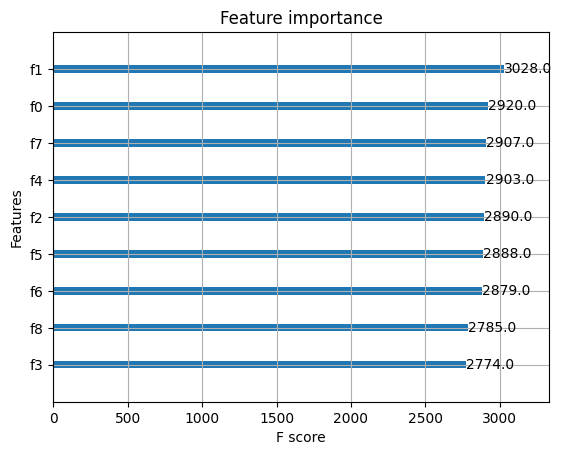

In [ ]:
plot_importance(xgb)

In [ ]:
models = [
    ('ada', AdaBoostClassifier()),
    ('light', LGBMClassifier(verbose=0)),
    ('xgb', XGBClassifier(device='cuda')),
    ('gb', GradientBoostingClassifier()),
    ('catboost', CatBoostClassifier())
]

In [ ]:
for name, model in models:
    model_steps = Pipeline(steps=[('models', model)])
    model_steps.fit(X_train, y_train)
    predictions = model_steps.predict(X_test)
    print(f'-------------------------{name}--------------------------\n')
    print(confusion_matrix(y_test_mapeado, predictions))
    print(classification_report(y_test_mapeado, predictions))

-------------------------ada--------------------------

[[953  70 104 123 151  32]
 [185 826  67 121 119  79]
 [153  87 737 177  91 217]
 [ 59  82 117 921  81  92]
 [185 115  43 268 657 162]
 [170  97 203 190 127 630]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      1433
           1       0.65      0.59      0.62      1397
           2       0.58      0.50      0.54      1462
           3       0.51      0.68      0.58      1352
           4       0.54      0.46      0.49      1430
           5       0.52      0.44      0.48      1417

    accuracy                           0.56      8491
   macro avg       0.56      0.56      0.55      8491
weighted avg       0.56      0.56      0.55      8491

-------------------------light--------------------------

[[1245   38   40   38   49   23]
 [  31 1279   12   49   12   14]
 [  44   18 1280   31   33   56]
 [  15    9   29 1257   23   19]
 [  32   24    7   26 1323   18]
 [  21   18   2

In [ ]:
y_test_mapeado

11617    2
7441     0
4420     2
9161     0
14360    1
        ..
8645     1
18506    3
8876     5
6958     0
19462    3
Name: quality, Length: 8491, dtype: int64

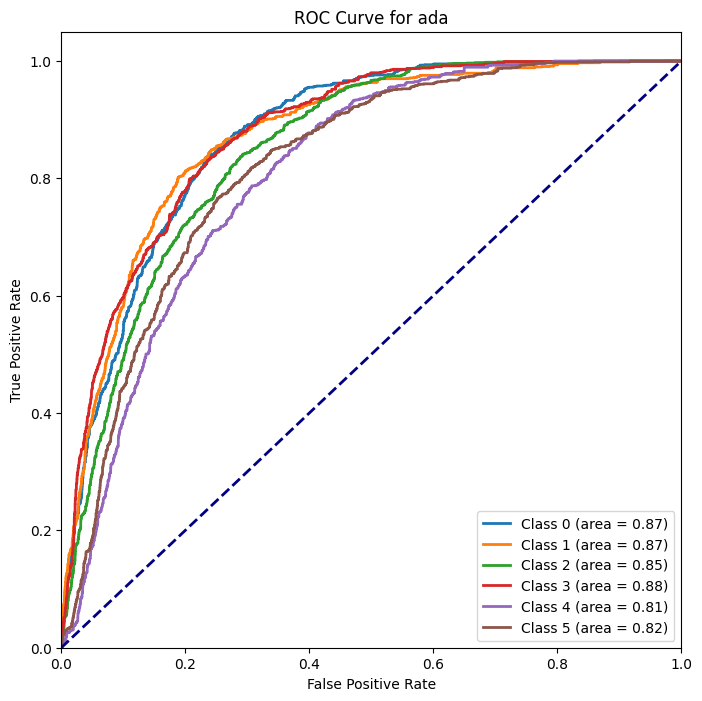

-------------------------ada--------------------------

[[953  70 104 123 151  32]
 [185 826  67 121 119  79]
 [153  87 737 177  91 217]
 [ 59  82 117 921  81  92]
 [185 115  43 268 657 162]
 [170  97 203 190 127 630]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      1433
           1       0.65      0.59      0.62      1397
           2       0.58      0.50      0.54      1462
           3       0.51      0.68      0.58      1352
           4       0.54      0.46      0.49      1430
           5       0.52      0.44      0.48      1417

    accuracy                           0.56      8491
   macro avg       0.56      0.56      0.55      8491
weighted avg       0.56      0.56      0.55      8491

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in

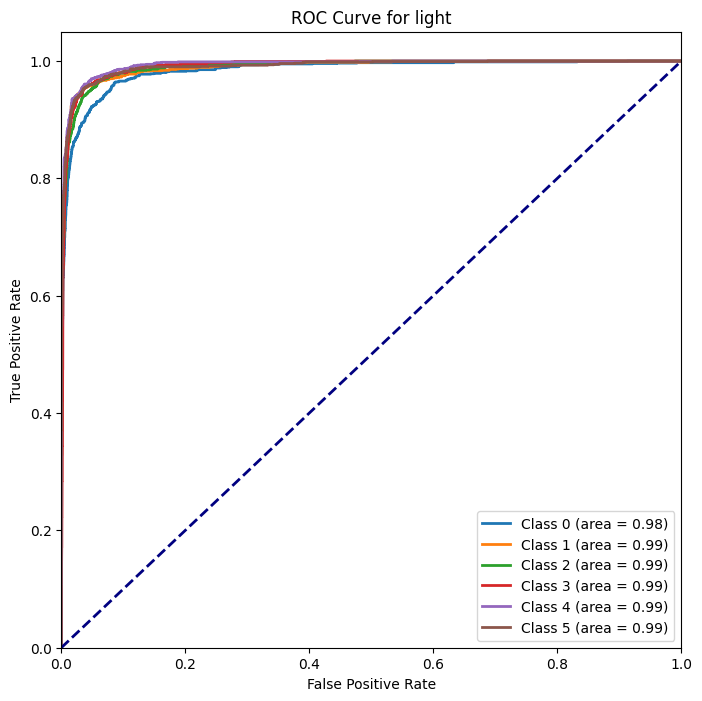

-------------------------light--------------------------

[[1245   38   40   38   49   23]
 [  31 1279   12   49   12   14]
 [  44   18 1280   31   33   56]
 [  15    9   29 1257   23   19]
 [  32   24    7   26 1323   18]
 [  21   18   28   25   22 1303]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1433
           1       0.92      0.92      0.92      1397
           2       0.92      0.88      0.90      1462
           3       0.88      0.93      0.90      1352
           4       0.90      0.93      0.91      1430
           5       0.91      0.92      0.91      1417

    accuracy                           0.91      8491
   macro avg       0.91      0.91      0.91      8491
weighted avg       0.91      0.91      0.91      8491



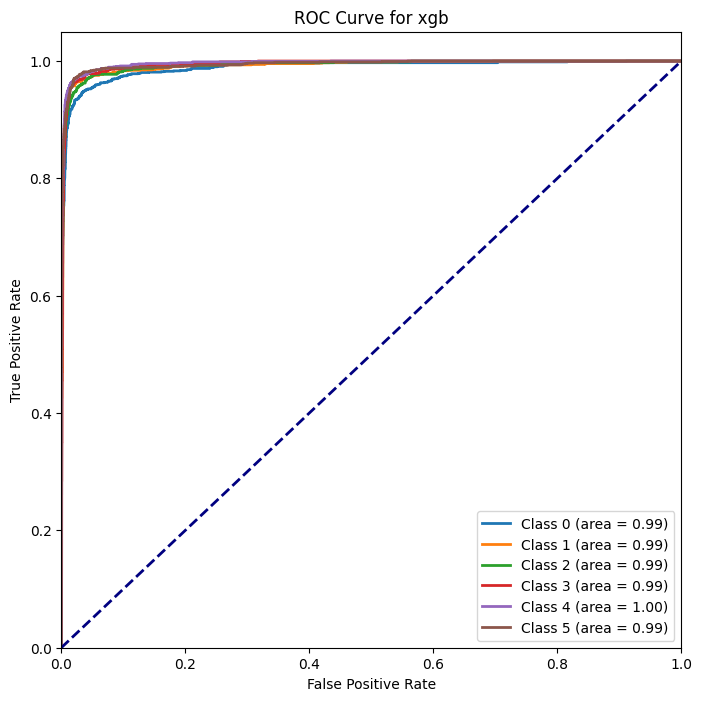

-------------------------xgb--------------------------

[[1317   23   22   18   37   16]
 [  26 1311    8   34    7   11]
 [  29    7 1348   20   18   40]
 [  14   11   22 1288    5   12]
 [  20   16    5   26 1359    4]
 [  18   15   17   12   15 1340]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1433
           1       0.95      0.94      0.94      1397
           2       0.95      0.92      0.93      1462
           3       0.92      0.95      0.94      1352
           4       0.94      0.95      0.95      1430
           5       0.94      0.95      0.94      1417

    accuracy                           0.94      8491
   macro avg       0.94      0.94      0.94      8491
weighted avg       0.94      0.94      0.94      8491



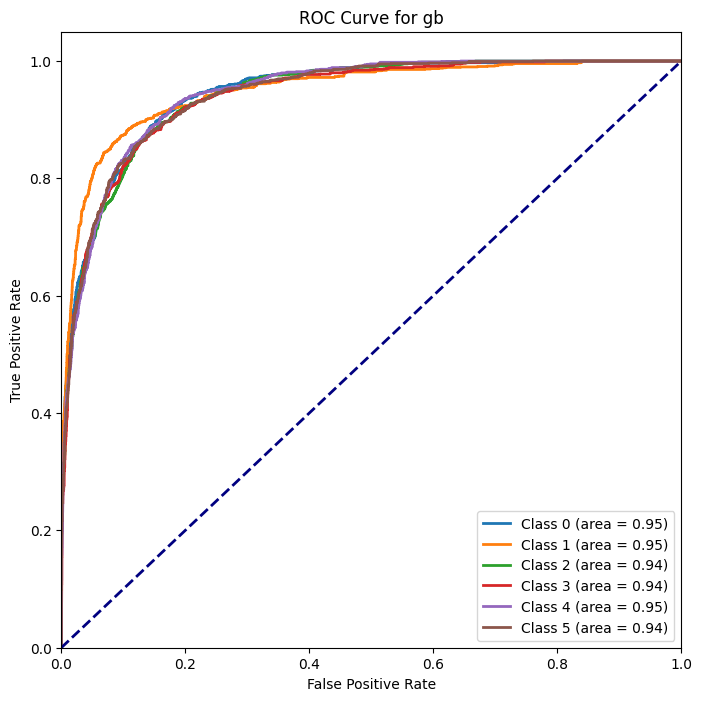

-------------------------gb--------------------------

[[1045   74   91   86   95   42]
 [ 100 1072   37   96   52   40]
 [  95   65  981   89   92  140]
 [  50   52   79 1020   95   56]
 [ 107   67   10  114 1062   70]
 [  49   37   99   96  128 1008]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1433
           1       0.78      0.77      0.78      1397
           2       0.76      0.67      0.71      1462
           3       0.68      0.75      0.72      1352
           4       0.70      0.74      0.72      1430
           5       0.74      0.71      0.73      1417

    accuracy                           0.73      8491
   macro avg       0.73      0.73      0.73      8491
weighted avg       0.73      0.73      0.73      8491

Learning rate set to 0.092144
0:	learn: 1.7099127	total: 34.9ms	remaining: 34.9s
1:	learn: 1.6449014	total: 65.8ms	remaining: 32.8s
2:	learn: 1.5897014	total: 93.7ms	remaining: 31.2s
3:	learn: 1.5382167	

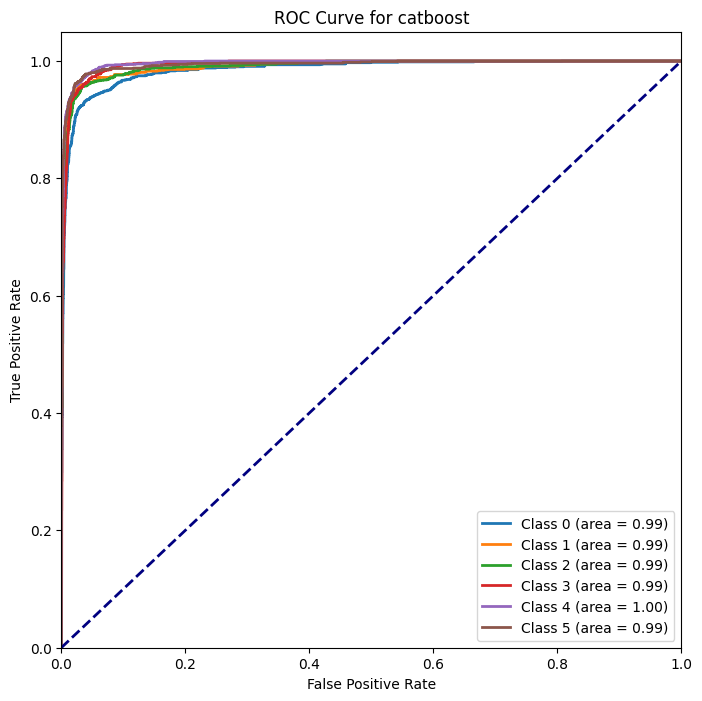

-------------------------catboost--------------------------

[[1264   35   39   31   41   23]
 [  31 1281   21   41   13   10]
 [  39   11 1325   24   29   34]
 [  12   12   25 1272   17   14]
 [  25   17    2   25 1347   14]
 [  10   11   16   20   24 1336]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1433
           1       0.94      0.92      0.93      1397
           2       0.93      0.91      0.92      1462
           3       0.90      0.94      0.92      1352
           4       0.92      0.94      0.93      1430
           5       0.93      0.94      0.94      1417

    accuracy                           0.92      8491
   macro avg       0.92      0.92      0.92      8491
weighted avg       0.92      0.92      0.92      8491



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, y_train, X_test, and y_test_mapeado are defined earlier

# XGBoost
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), use_label_encoder=False, device='cuda')
models = [
    ('ada', AdaBoostClassifier()),
    ('light', LGBMClassifier()),
    ('xgb', XGBClassifier(device='cuda',)),
    ('gb', GradientBoostingClassifier()),
    ('catboost', CatBoostClassifier())
]


# Binarize the labels for multi-class ROC curves
classes = np.unique(y_test_mapeado)
y_test_bin = label_binarize(y_test_mapeado, classes=classes)

for name, model in models:
    model_steps = Pipeline(steps=[('model', model)])
    model_steps.fit(X_train, y_train)
    predictions = model_steps.predict(X_test)

    # Get predicted probabilities for each class
    probas = model_steps.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probas[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 8))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

    print(f'-------------------------{name}--------------------------\n')
    print(confusion_matrix(y_test_mapeado, predictions))
    print(classification_report(y_test_mapeado, predictions))


Dr. Anton Ego marcou uma data para comparecer na vinícula e degustar seus melhores rótulos. Nascido na França e o enólogo mais famoso do mundo, Anton era temido pelas suas análises minuciosas e certeiras. As críticas eram tão serveras que tão severas que 80% das vinículas eram fechadas pela falta de aceitação do mercado. Apenas =~ 19.99% sobreviviam sem danos consideráveis e somente $0.1x10^{-15}$% se tornavam uma lenda.

Chuck tomava leite da papoula para suportar tamanha disruptura emocional. Sir.Donald, tomado pela a ansiedade, estava com seus pruridos mentais em Nárnia até que sua esposa, Srta.Audrey Hepburn assumiu a liderança do projeto com a serenidade de um bebê.

Primeiramente ordenou que todos os vinhos que já vinham há algum tempo em processo de envelhecimento em barricas de carvalho fossem engarrafados e que amostras de todos fossem coletadas para análise.

Sua maior preocupação é que somente sejam servidos os vinhos de nota oito ou nove, pois ambos são de mesmíssima qualidade, ficando a avaliação a critério da subjetividade palatal do degustador. Em **<u>hipótese nenhuma</u>** um vinho que não tenha tais notas pode ser servido.

De todas as novas garrafas, serão servidas somente três que você autorizar. O Dr. Ego só toma vinho tinto!


Sabendo que você já tinha um modelo validado para solucionar este tipo de problema, pediu que o usasse na base **'desafio.csv''**. Ao fim, crie uma célula e copie os 3 vinhos que escolheu para registrar sua resposta.


In [ ]:
desafio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/desafio.csv')

In [ ]:
desafio

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,13405.0,7.482429,1.414854,1.219042,9.283630,0.480959,225.801570,186.27306,1.008194,3.735878,1.417784,11.127883,5.0
1,1,13245.0,6.236732,0.537218,0.301309,61.580204,0.165759,21.124222,263.54495,1.019862,2.828603,1.380267,12.480662,3.0
2,2,4760.0,8.680564,1.246281,0.998889,39.747470,0.381716,75.311360,348.92334,1.008072,3.734259,0.782335,9.997410,3.0
3,3,12552.0,10.382415,1.331569,1.169755,49.025560,0.233230,77.187940,402.74580,1.011393,3.918096,1.766772,9.224346,3.0
4,4,3336.0,7.914051,1.343834,0.549455,28.564130,0.280058,206.070850,353.70145,1.001581,3.787718,0.592497,10.377962,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13885,10056,NaN,10.446169,1.389182,0.195612,12.249456,0.605907,282.074950,94.53296,0.998037,3.620888,0.248081,9.535479,8.0
13886,10327,NaN,8.024291,1.019960,0.719228,57.219720,0.362750,44.598595,327.66953,1.015372,3.785024,1.400619,10.611106,8.0
13887,10476,NaN,7.618675,0.199272,1.007845,62.151990,0.171294,71.311295,271.10678,1.032512,3.394468,0.350322,9.248388,8.0
13888,10776,NaN,8.169376,1.321303,0.709551,47.448914,0.434178,218.054780,220.54855,0.999986,3.533469,0.571346,10.980176,8.0


In [ ]:
wines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines.csv')

In [ ]:
condition = (wines['color'] == 'white') | (wines['color'] == 'red')
wines = wines[condition]
wines['color'] = wines['color'].map({'white': 1, 'red': 0})

X = wines.drop(['quality','color','chlorides','free sulfur dioxide'], axis =1)


In [ ]:
X = scaler.fit_transform(X)
y = wines.loc[:,'color']
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
y_train.value_counts()

1    3466
0    3390
Name: color, dtype: int64

In [ ]:
models = [('ada',AdaBoostClassifier()),('light',LGBMClassifier(verbose=0 ,num_class = 1)),('xgb',XGBClassifier(device ='cuda')),('gb',GradientBoostingClassifier())]

In [ ]:
for name, model in models:
    model_steps = Pipeline(steps=[('models', model)])
    model_steps.fit(X_train, y_train)
    predictions = model_steps.predict(X_test)
    print(f'-------------------------{name}--------------------------\n')
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

-------------------------ada--------------------------

[[1489   18]
 [  18 1414]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1507
           1       0.99      0.99      0.99      1432

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939

-------------------------light--------------------------

[[1495   12]
 [   4 1428]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1507
           1       0.99      1.00      0.99      1432

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939

-------------------------xgb--------------------------

[[1496   11]
 [   7 1425]]
              precision    recall  f1-score   support

           0       1.00      0.99      0

In [ ]:
preditos = xgb.predict(X)

In [ ]:
# Encontrar índices onde o valor é 5
indices_5 = np.where(preditos == 5)[0]

# Selecionar valores e posições onde o valor é 5
valores_5 = preditos[indices_5]


In [ ]:
X[indices_5]

array([], shape=(0, 9), dtype=float64)

In [ ]:
indices_5

array([], dtype=int64)

In [ ]:
modelo = XGBClassifier(use_label_encoder=False)
modelo.fit(X_train, y_train)
vinh = modelo.predict(X[indices_5])


In [ ]:
vinh

array([], shape=(0, 0), dtype=float64)


**O modelo previu apenas dois vinhos que podem ser servidos, criamos um algoritmo para verificar se o vinho era tinto ou não, os dois escolhidos são tintos. São eles os vinos com indices 1601 ee 8616**

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (_features engineering_), o Sr.Rocky propôs que fossem utilizados Splines. Completamente emocionado com a ideia, Chuck decidiu aplicar esta técnica utilizando até a oitava potência.

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines.

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

In [ ]:
#Carregando as bases de dados do problema
#chamei de wines5 para não confundir
wines5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines.csv')
win_spline = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines_splines.csv')

In [ ]:
#tirando as cores write e red e trocando por 0 e 1 respectivamente de wines5
mappings={'white':0,'red':1}
wines5['color']=wines5['color'].map(mappings)

In [ ]:
# #tirando as cores de wines_splines
win_spline['color']=win_spline['color'].map(mappings)

In [ ]:
#conferindo se em wines5 ficaram com cores 0 e 1
wines5.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6


In [ ]:
#conferindo se em wines5 ficaram com cores 0 e 1
win_spline.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,spl_ln_sugar_4_3,spl_ln_sugar_4_4,spl_ln_sugar_4_5,spl_ln_sugar_4_6,spl_ln_sugar_4_7,spl_ln_sugar_4_8,spl_ln_sugar_4_9,spl_ln_sugar_4_10,spl_ln_sugar_4_11,spl_ln_sugar_4_12
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,...,59.093785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


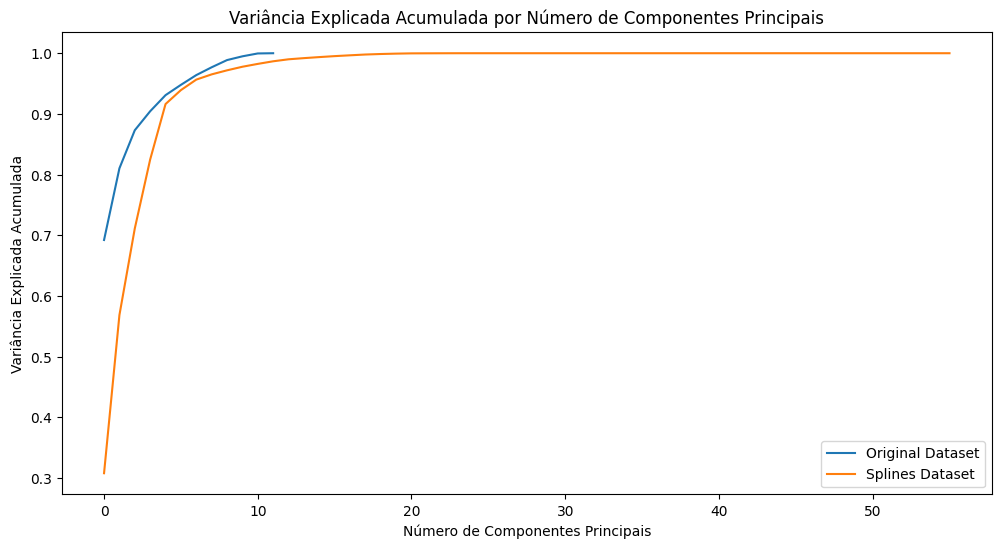

In [ ]:
# Separar as features e as labels/ considerando que minha classe alvo é quality
X_original = wines5.drop('quality', axis=1)  # Substitua 'class' pelo nome da coluna de labels
X_splines = win_spline.drop('quality', axis=1)

X_original_scaled = scaler.fit_transform(X_original)
X_splines_scaled = scaler.fit_transform(X_splines)

# Aplicar PCA nos datasets originais e com Splines
pca_original = PCA().fit(X_original_scaled)
pca_splines = PCA().fit(X_splines_scaled)

# Calcular a variância explicada acumulada
var_exp_original = np.cumsum(pca_original.explained_variance_ratio_)
var_exp_splines = np.cumsum(pca_splines.explained_variance_ratio_)

# Plotar as curvas de variância explicada acumulada
plt.figure(figsize=(12, 6))
plt.plot(var_exp_original, label='Original Dataset')
plt.plot(var_exp_splines, label='Splines Dataset')
plt.title('Variância Explicada Acumulada por Número de Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.show()

Será gerado um gráfico com duas linhas uma azul que representa o conjunto de dados originais e a laranja para o conjunto de dados com Splines. As curvas começam a se estabilizar mostrando que 10 principais componentes são responsáveis pela definição da qualidade do vinho, e que com a Spline é adicionada mais complexidade ao conjunto de dados, exigindo mais componentes para representar a mesma informação. Assim a redução da dimensionalidade dada pelo uso da PCA será mais eficiente no conjunto de dados originais !

Com relação aos ruídos existem uma série de questões que podem ser abordadas:
1. Sensibilidade dos dados - Com as Splines de ordens mais altas o modelo pode ser mais sensível aos dados, modificando os polinômios em questão.
2. Supertreinamento (overliffiting)-
O uso de ordens mais altas pode levar a um supertreinamento do modelo, e ele ficar adequado apenas para a base de dados e tem dificuldade em generalizar principalmente se houverem ruídos ou variações nos dados
3. Interpretação-
Para a compreenssão do modelo o uso do spline pode piorar!
4. Alcance do modelo gerado-
as técnicas de PCA são projetados para lidar com padrões mais amplos, enquanto que as splines podem se ajustar aos detalhes dos daods
5. Validação-
Para a validação cruzada do modelo é interessante a utilização dos splines

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

Foram 8 componentes!

In [ ]:
# Separar as features e as labels (considerando 'quality' como a classe alvo)
X = wines5.drop('quality', axis=1)

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Exibir os autovetores correspondentes aos primeiros 10 autovalores
num_componentes = 10
for i in range(num_componentes):
    print(f"Autovetor {i + 1}:\n{pca.components_[i]}\n")

Autovetor 1:
[ 0.4706261   0.2570173   0.35886762 -0.11420207 -0.24592212  0.29531826
 -0.34537686 -0.41300482  0.14202046  0.18067151  0.28261911  0.0197692 ]

Autovetor 2:
[ 0.07662372  0.27271181  0.03408306  0.20737421  0.3977858   0.24118111
  0.16941909  0.19124771  0.56126702 -0.19424081  0.1209712  -0.47594829]

Autovetor 3:
[-0.04875282  0.45020181 -0.28662001  0.58520416 -0.1727434   0.00682501
 -0.15717125 -0.12677748 -0.16145182 -0.44960499  0.08830753  0.25229902]

Autovetor 4:
[ 0.01633529 -0.16519129 -0.21738081  0.26728196 -0.16508394  0.23710754
  0.36392248  0.21199129 -0.07479748  0.41313953  0.63591644  0.110588  ]

Autovetor 5:
[-0.07679748 -0.15416435  0.14870434 -0.1600073  -0.35652927  0.64102594
  0.17255092  0.13823056 -0.29498881 -0.43710512 -0.10999728 -0.21338371]

Autovetor 6:
[ 0.10959156  0.21568113  0.48669143 -0.19931509  0.18619462 -0.16269198
  0.42305772  0.17956585 -0.04237434 -0.29608961  0.209212    0.50919853]

Autovetor 7:
[ 0.16143881  0.27603

In [ ]:
def encontrar_numero_componentes(X_scaled, limiar_variancia):
    pca = PCA()
    pca.fit(X_scaled)
    var_exp_acumulada = np.cumsum(pca.explained_variance_ratio_)

    for i, var in enumerate(var_exp_acumulada):
        if var > limiar_variancia:
            return i + 1  # Adicionamos 1 para contar a partir de 1, não de 0

# Separar as features e as labels (considerando 'quality' como a classe alvo)
X = wines5.drop('quality', axis=1)

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar o número mínimo de componentes para atingir uma variância de 0.92
limiar_variancia = 0.92
num_componentes_wines5 = encontrar_numero_componentes(X_scaled, limiar_variancia)

print(f"Número mínimo de componentes para wines5: {num_componentes_wines5}")


Número mínimo de componentes para wines5: 8


In [ ]:
#primeiro para wines_splines
def encontrar_numero_componentes(X_scaled, limiar_variancia):
    pca = PCA()
    pca.fit(X_scaled)
    var_exp_acumulada = np.cumsum(pca.explained_variance_ratio_)

    for i, var in enumerate(var_exp_acumulada):
        if var > limiar_variancia:
            return i + 1  # Adicionamos 1 para contar a partir de 1, não de 0

# Separar as features e as labels (considerando 'quality' como a classe alvo)
X = win_spline.drop('quality', axis=1)

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar o número mínimo de componentes para atingir uma variância de 0.92
limiar_variancia = 0.92
num_componentes_wines_splines = encontrar_numero_componentes(X_scaled, limiar_variancia)

print(f"Número mínimo de componentes para wines_splines: {num_componentes_wines_splines}")

Número mínimo de componentes para wines_splines: 12


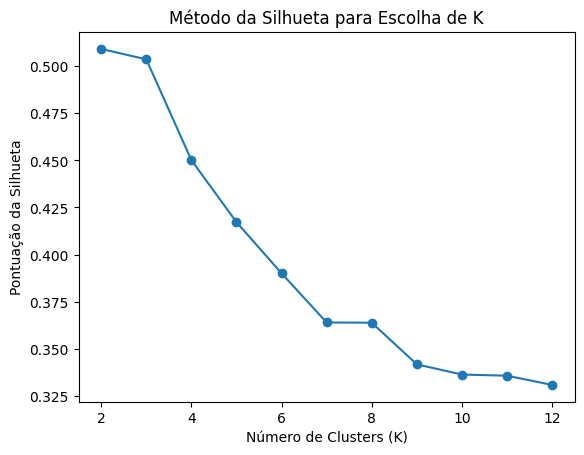

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Carregando as bases de dados do problema
# Chamei de wines6 para não confundir
wines6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines.csv')


# Tirando as cores write e red e trocando por 0 e 1 respectivamente de wines5
mappings = {'white': 0, 'red': 1}
wines6['color'] = wines6['color'].map(mappings)

# Conferindo se em wines6 ficaram com cores 0 e 1
wines6.head(500)

silhouette_scores = []

# Loop sobre diferentes valores de k
for k in range(2, 13):
    # Modelo K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(wines6)

    # Cálculo da pontuação da silhueta
    silhouette_avg = silhouette_score(wines6, labels)
    silhouette_scores.append(silhouette_avg)

# Plote da curva da silhueta para a escolha do número ideal de clusters
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.title('Método da Silhueta para Escolha de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Pontuação da Silhueta')
plt.show()

**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster.

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

In [ ]:
import warnings as warn
warn.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import model_selection, cluster
import matplotlib.pyplot as plt
from matplotlib import style
from time import time
import math
style.use('ggplot')
%matplotlib inline


In [ ]:
def test_cluster(clf, data):

    t0 = time()
    clf.fit(data)
    centroids = clf.cluster_centers_
    print("Tempo:", round(time()-t0, 3), "s")

    colors = 10*["g","r","c","b","k"]

    for color, feature in zip(clf.labels_, data.values):
        plt.scatter(feature[6], feature[7], color=colors[color], s=10)


    for c in range(len(clf.cluster_centers_)):
        plt.scatter(centroids[c][6], centroids[c][7],
            marker="o", color=colors[c], edgecolors='w', s=50, linewidths=1)

    labels = data.columns
    plt.xlabel(labels[6])
    plt.ylabel(labels[7])
    plt.show()


In [ ]:
# implementação própria para aprendizado do algoritmo
class k_means(object):

    # construtor
    def __init__(self, k, tol = 0.0001, max_iter = 500):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.inertia_ = 0

    # Inertia: Soma das distâncias das amostras ao centroide mais próximo
    def inertia(self, data):
        feature_matrix={}
        for i in range(self.k) :
            feature_matrix[i]=[]

        centroids = []
        for l in self.cluster_centers_:
            if ~np.isnan(l[0]):
                centroids.append(l)

        for color, feature in zip(self.labels_, data.values):
            feature_matrix[color].append(feature)

        sum_ = 0

        for i in feature_matrix:
            try:
                pointcentroid=centroids[i]
            except:
                pointcentroid = np.NaN

            try:
                sum_ = sum_ + np.sum((feature_matrix[i] - pointcentroid)**2) #implementação de inércia, conforme indicado nos documentos do scikit, ou seja, soma da distância ao quadrado.
            except:
                sum_ = sum_ + 0

        self.inertia_ = sum_

    # treinamento

    def fit(self, data):
        self.soma=0
        self.labels_ = np.zeros(shape=(len(data)))
        # seleciona os centros aleatoriamente para começar
        rand_k = [np.random.randint(0, len(data)) for rand in range(self.k)]

        # definir aleatoriamente em qual cluster ficará um dado
        self.cluster_centers_ = data.iloc[rand_k, :].values

        # laço irá parar quando atingir max_iter ou atingir o limiar
        for _ in range(self.max_iter):
            # cria classes vazias para serem povoadas
            temp_class = {}
            for i in range(self.k):
                temp_class[i] = []

            # acha que ponto pertence a que centro / centroide
            for j, i in enumerate(data.values):
                # acha a distância entre a observação i e cada centro
                dist = [np.linalg.norm(i-kj) ** 2 for kj in self.cluster_centers_]
                # classifica a observação i a um centro
                clas = dist.index(min(dist))
                temp_class[clas].append(i)
                self.labels_[j] = clas

            # tira centro antigo para verificar otimização.
            # passa por cópia e ñ por referência
            prev_centers = np.array(self.cluster_centers_)

            # atualiza os centros
            for i, _ in enumerate(self.cluster_centers_):
                self.cluster_centers_[i] = np.array(temp_class[i]).mean(axis=0)

            # verifica convergência
            var = np.sum((self.cluster_centers_ - prev_centers) /
                         prev_centers*100.0)

            if var < self.tol:
                break  # sairá do laço, pois a diferença do
                       # cluster com cluster anterior é menor que o limiar definido

        # converta as classes para ints
        self.labels_ = self.labels_.astype(int)

        #calcular inertia_
        self.inertia(data)


In [ ]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.utils import gen_batches


Resultados do criado manualmente
[[2.06686930e-02 6.92153495e+00 2.87045593e-01 3.43103343e-01
  7.51127660e+00 4.92218845e-02 4.12887538e+01 1.60753040e+02
  9.94995274e-01 3.18961398e+00 5.01133739e-01 1.01828561e+01
  5.80273556e+00]
 [8.68667917e-01 8.08855535e+00 4.94596623e-01 2.58198874e-01
  2.53452158e+00 8.24953096e-02 1.58095685e+01 4.36791745e+01
  9.96121839e-01 3.30814259e+00 6.31369606e-01 1.05114447e+01
  5.64352720e+00]
 [1.16247451e-01 6.88477226e+00 3.09717879e-01 3.11244052e-01
  4.19313392e+00 4.63786540e-02 2.29847043e+01 1.00369816e+02
  9.92965561e-01 3.20467029e+00 4.97341944e-01 1.09736460e+01
  5.94357580e+00]
 [7.12121212e-01 7.67500000e+00 4.47424242e-01 2.75037879e-01
  2.59924242e+00 7.96060606e-02 2.46780303e+01 6.36780303e+01
  9.95387121e-01 3.29071970e+00 6.19507576e-01 1.05063131e+01
  5.57575758e+00]
 [9.68980798e-01 8.55228951e+00 5.08611521e-01 2.83441654e-01
  2.40236337e+00 8.22584934e-02 7.80649926e+00 1.96307238e+01
  9.96467312e-01 3.2927474

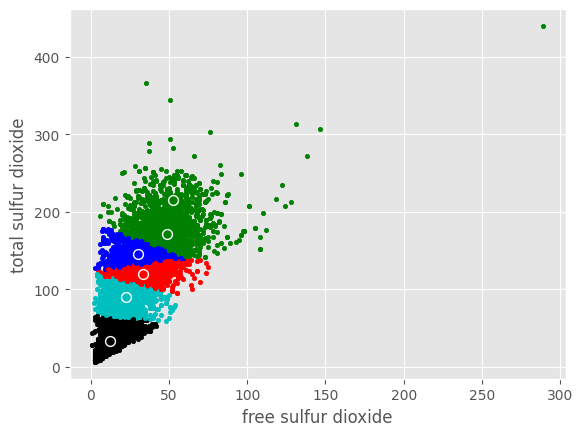


Comparando com os resultados do Sklearn
[[1.88857413e-03 6.92001889e+00 2.75217186e-01 3.52587347e-01
  8.40302172e+00 5.13890463e-02 4.86133144e+01 1.71107177e+02
  9.95582498e-01 3.18776204e+00 5.02898961e-01 9.93997482e+00
  5.72804533e+00]
 [4.72756410e-02 6.78337340e+00 2.79839744e-01 3.27123397e-01
  5.45633013e+00 4.46594551e-02 3.36758814e+01 1.19740785e+02
  9.93303710e-01 3.19840545e+00 4.90913462e-01 1.08523905e+01
  6.08253205e+00]
 [2.16255443e-01 7.04905660e+00 3.31669086e-01 3.07772134e-01
  3.55812772e+00 5.21001451e-02 2.24658926e+01 8.94368650e+01
  9.93126753e-01 3.21476778e+00 5.14586357e-01 1.09621674e+01
  5.89695210e+00]
 [3.39342524e-02 6.96935313e+00 2.99209968e-01 3.29597031e-01
  6.40137858e+00 4.83679745e-02 3.03123012e+01 1.45755037e+02
  9.94459014e-01 3.19525981e+00 4.98812301e-01 1.03641357e+01
  5.81760339e+00]
 [9.12254160e-01 8.29485628e+00 4.99614221e-01 2.70567322e-01
  2.44183056e+00 8.17473525e-02 1.24368381e+01 3.26210287e+01
  9.96259334e-01 3.

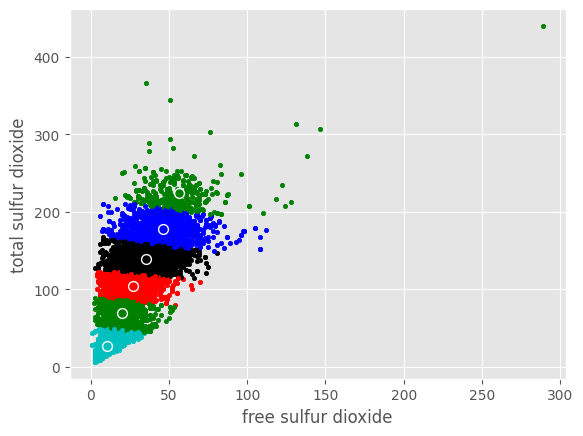

In [ ]:
#lê os dados
#dados podem ser encontrados no link abaixo
# http://www.cengage.com/aise/economics/wooldridge_3e_datasets/
# OBS: dados utilizados aqui já foram convertidos de excel para csv
win5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/wines.csv')
mappings={'white':0,'red':1}
win5['color']=win5['color'].map(mappings)

#data = pd.read_csv('hprice.csv', sep=',', usecols = ['price', 'sqrft'])
#data.fillna(-99999, inplace = True)

# Testa regressor criado manualmente
print('\nResultados do criado manualmente')
clf = k_means(k=6)
clf.fit(win5)
print(clf.cluster_centers_)
test_cluster(clf, win5)

# Compara o regressor com o do sklearn
print('\nComparando com os resultados do Sklearn')
kmeans = cluster.KMeans(n_clusters=6)
kmeans.fit(win5)
print(clf.cluster_centers_)
test_cluster(clf, win5)
y_kmeans = kmeans.predict(win5)


Tempo: 0.686 s


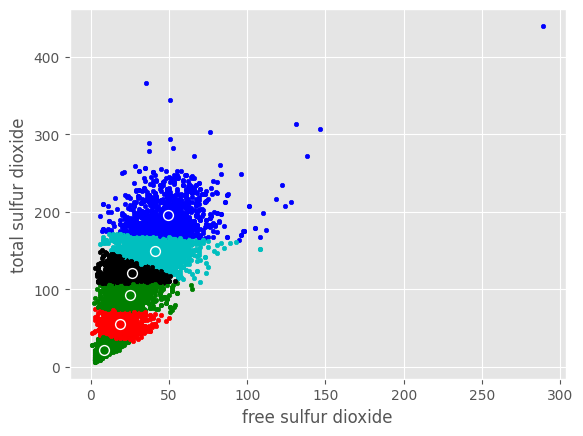

In [ ]:
test_cluster(clf, win5)

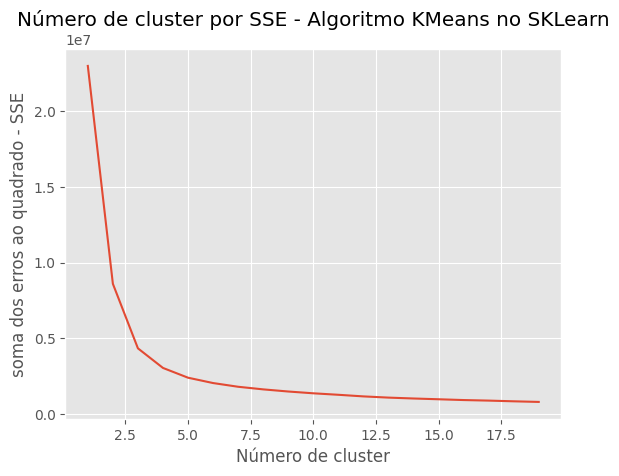

5

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

sse = {}
faixa = range(1,20)
for kclusters in faixa:
    kmeans1 = KMeans(n_clusters=kclusters)
    kmeans1.fit(win5)
    sse[kclusters] = kmeans1.inertia_ # Inertia: Soma das distâncias das amostras ao centro de aglomerado mais próximo

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de cluster")
plt.ylabel("soma dos erros ao quadrado - SSE")
plt.title("Número de cluster por SSE - Algoritmo KMeans no SKLearn")
plt.show()

def elbow(array):
    se = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=array)
        se.append(kmeans.inertia_)
    x1, y1 = 2, se[0]
    x2, y2 = 20, se[len(se)-1]
    distances = []
    for i in range(len(se)):
        x0 = i+2
        y0 = se[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

elbow(win5)

  **QUESTÃO TEÓRICA:**

---



Ambos os métodos, do cotovelo e silhueta são técnicas matemáticas utilizadas na avaliação de algoritmos de agrupamento, como o Kmeans. O método do cotovelo é feito em relação à soma dos erros ao quadrado (WCSS), ele retorna um gráfico onde vamos procurar o valor ótimo de k, ou seja, é específico para ajudar a escolher o número ideal de clusters.  O ponto onde a curva começa a se assemelhar a um cotovelo é um candidato para o número ideal de clusters.
O método Silhueta é utilizado para avaliar a qualidade geral dos clusters. A pontuação da silhueta oferece uma métrica mais abrangente para avaliar a qualidade dos clusters formados, independente do número de clusters escolhido e, é útil para avaliar a coesão e separação dos clusters.
Em muitos casos, essas duas abordagens podem ser usadas em conjunto para uma avaliação mais completa.

**Utilize o dataset 'logs_firewall.xlsx'**

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras matérias. Todos os professores, escanções extremamente bem conceituados, sempre estão presentes.

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores.

O Sr.Donald Shelby aproximou-se para falar com você sobre as políticas da empresa, criadas por sua esposa, que dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escravos~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma regra clara da empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava "desatento" e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado quaisquer dados seria torturado, por isso não poderia simplesmente colocá-los de volta no banco e, como não queria morrer, tinha de encontrar vias oblíquas para dirimir a questão.

Erick Cartman, analista de infraestrutura, recebeu ordens para recuperar os dados a qualquer custo e, caso falhasse, seria devidamente penalizado ~executado~. Desolado, regado a fanta uva, com palavras arrastadas e chiadas, Erick lhe pediu ajuda. Com muita pena, pegou seu disquete que continha a cópia dos dados e o entregou, pedindo extrema confidencialidade.

Para sua surpresa, após ter a vida salva, receber aumentos salariais e bonificações, Erick te chantageou. "Agora pediram para eu analisar os logs do firewall que contém informações de acesso a servidores e descobrir os possíveis culpados. Eu não sei fazer isso não, 'ocê tá LOUKO'. Dá teus pulos aí se não eu te conto que você copia dados da empresa!!!"

Conhecedor de diversas técnicas para detecção de outliers, se lembrou de uma que já tinha experiência: Isolation Forest.

1- Descubra o nome do responsável pelo o ataque.

**ps**: Recentemente houve um estudo estatístico que comprovou que existe um fator de risco em relação aos horários de acesso, são eles:  

Entre 09:00 às 12:00 o risco varia entre 0-10%

Entre 12:00 às 14:00 o risco varia entre 5-10%

Entre 14:00 às 19:00 o risco varia entre 0-10%

Entre 19:00 às 21:00 o risco varia entre 20-30%

Entre 21:00 às 23:00 o risco varia entre 40-50%

Entre 00:00 às 02:00 o risco varia entre 60-80%

Entre 02:00 às 06:00 o risco varia entre 80-100%

Entre 06:00 às 09:00 o risco varia entre 30-40%

**<u>Esse fator pode ser recriado usando o método 'random.uniform', com 'seed' = 64.</u>**

In [ ]:
 import pandas as pd
 hack = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/aulas_pos/andre/logs_firewall.xlsx')

In [ ]:
hack.head(200)

,H,M,S,Nome,Maquina,IP
0,16,29,4,theteacher@empresax.COM.BR,empresaxLAB02$,192.168.100.57
1,14,12,4,pogó@empresax.COM.BR,empresaxLAB05$,192.168.100.66
2,12,55,4,jinx@empresax.COM.BR,empresaxLAB03$,192.168.100.60
3,18,22,4,kael-el@empresax.COM.BR,empresaxWKSLEN02$,192.168.100.55
4,12,3,4,maryjane@empresax.COM.BR,empresaxLAB04$,192.168.100.58
...,...,...,...,...,...,...
195,16,1,2,laracroft@empresax.COM.BR,empresaxWKS13A$,192.168.100.64
196,16,26,2,hanskelsen@empresax.COM.BR,empresaxWKS05$,192.168.100.59
197,18,48,2,theteacher@empresax.COM.BR,empresaxLAB02$,192.168.100.57
198,3,19,2,pogó@empresax.COM.BR,empresaxLAB05$,192.168.100.66


In [ ]:
hack['H'].value_counts()

16    139
18    124
13    107
12    102
19    100
17     98
15     95
20     82
14     80
11     51
22     21
21     20
23     17
2      10
3      10
9       9
5       8
6       6
7       6
4       5
0       5
1       3
8       2
10      2
Name: H, dtype: int64

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
hack['maquina_encoded'] = label_encoder.fit_transform(hack['Maquina'])

In [ ]:
hack['ip_encoded'] = label_encoder.fit_transform(hack['IP'])

In [ ]:
hack['nome_encoded'] = label_encoder.fit_transform(hack['Nome'])

In [ ]:
h_mapping = {
    6: 3, 7: 3, 8: 3,
    9: 0, 10: 0, 11: 0,
    12: 1, 13: 1, 14: 0,
    15: 0, 16: 0, 17: 0,
    18: 0, 19: 2, 20: 2,
    21: 4, 22: 4, 23: 5,
    0: 6, 1: 6, 2: 7,
    3: 7, 4: 7, 5: 7
}
hack['h_encoded'] = hack['H'].map(h_mapping)

In [ ]:
hack_novo = hack.iloc[:, -4:].copy()

In [ ]:
hack_novo

,maquina_encoded,ip_encoded,nome_encoded,h_encoded
0,2,6,13,0
1,5,15,11,0
2,3,9,4,1
3,13,4,5,0
4,4,7,8,1
...,...,...,...,...
1097,13,3,5,0
1098,2,7,13,2
1099,6,9,2,1
1100,14,17,0,0


In [ ]:
scaler = StandardScaler()

<Axes: >

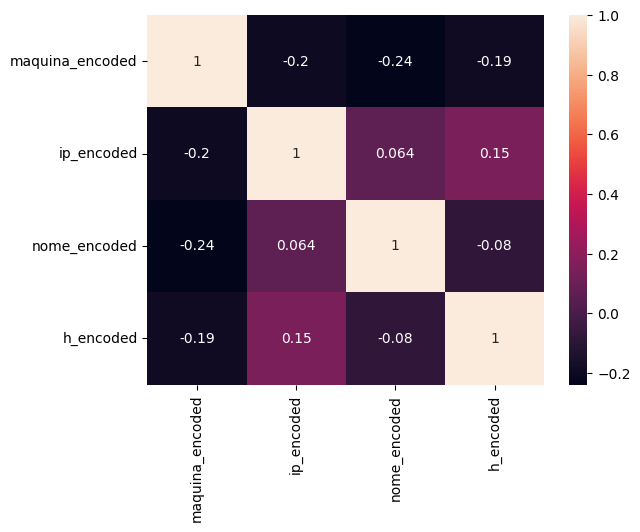

In [ ]:
sns.heatmap(hack_novo.corr(numeric_only=True),annot=True)

In [ ]:
isolation = IForest(contamination=0.01, n_jobs=-1)

In [ ]:
isolation.fit(hack_novo)

IForest(behaviour='old', bootstrap=False, contamination=0.01,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=None, verbose=0)

In [ ]:
previsoes = isolation.predict(hack_novo)
hack_novo['outlier'] = previsoes

In [ ]:
outliers_iguais_a_1 = hack_novo[hack_novo['outlier'] == 1]
print(outliers_iguais_a_1)

     maquina_encoded  ip_encoded  nome_encoded  h_encoded  outlier
107               13          28             5          0        1
115               13          28             5          0        1
198                5          15            11          7        1
217                2           6            13          5        1
270               13          28             5          0        1
271               11          31             7          5        1
326                5          15            11          7        1
347               13          28             5          1        1
458               13          28             5          2        1
738                8           8             1          7        1


In [ ]:
hack.loc[hack_novo['outlier'] == 1]

,H,M,S,Nome,Maquina,IP,maquina_encoded,ip_encoded,nome_encoded,h_encoded
107,11,50,5,kael-el@empresax.COM.BR,empresaxWKSLEN02$,192.168.109.52,13,28,5,0
115,15,1,5,kael-el@empresax.COM.BR,empresaxWKSLEN02$,192.168.109.52,13,28,5,0
198,3,19,2,pogó@empresax.COM.BR,empresaxLAB05$,192.168.100.66,5,15,11,7
217,23,3,2,theteacher@empresax.COM.BR,empresaxLAB02$,192.168.100.57,2,6,13,5
270,17,12,0,kael-el@empresax.COM.BR,empresaxWKSLEN02$,192.168.109.52,13,28,5,0
271,23,23,0,magaiver@empresax.COM.BR,empresaxWKS14A$,192.168.109.64,11,31,7,5
326,2,10,2,pogó@empresax.COM.BR,empresaxLAB05$,192.168.100.66,5,15,11,7
347,13,5,5,kael-el@empresax.COM.BR,empresaxWKSLEN02$,192.168.109.52,13,28,5,1
458,20,19,0,kael-el@empresax.COM.BR,empresaxWKSLEN02$,192.168.109.52,13,28,5,2
738,3,23,2,boss@empresax.COM.BR,empresaxWKS05$,192.168.100.59,8,8,1,7


In [ ]:
# FOI O MAGAIVER